In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import shap
from ydata_profiling import ProfileReport
import sweetviz as sv


In [3]:
# set seed
seed = 2024
np.random.seed(seed)

# Business Understanding
***Problem:***
1. received recipe does not match the customer's **diet**
2. 

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


                                             |          | [  0%]   00:00 -> (? left)


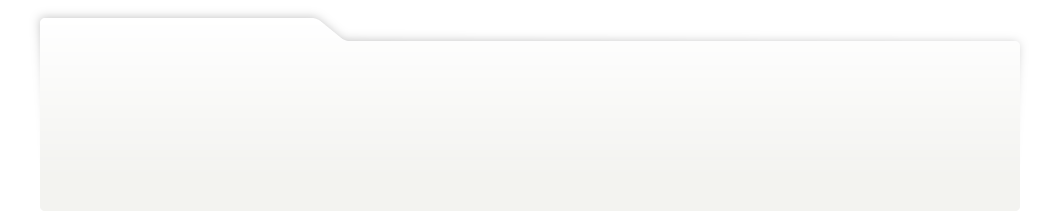
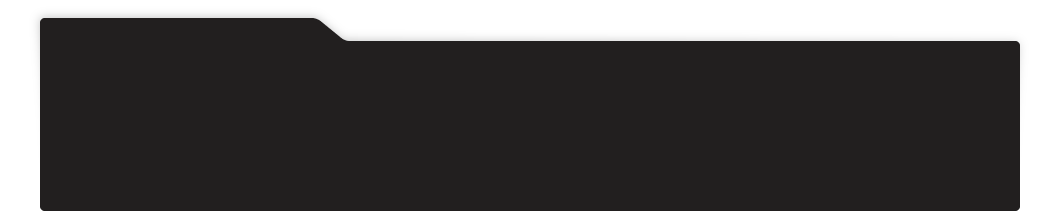
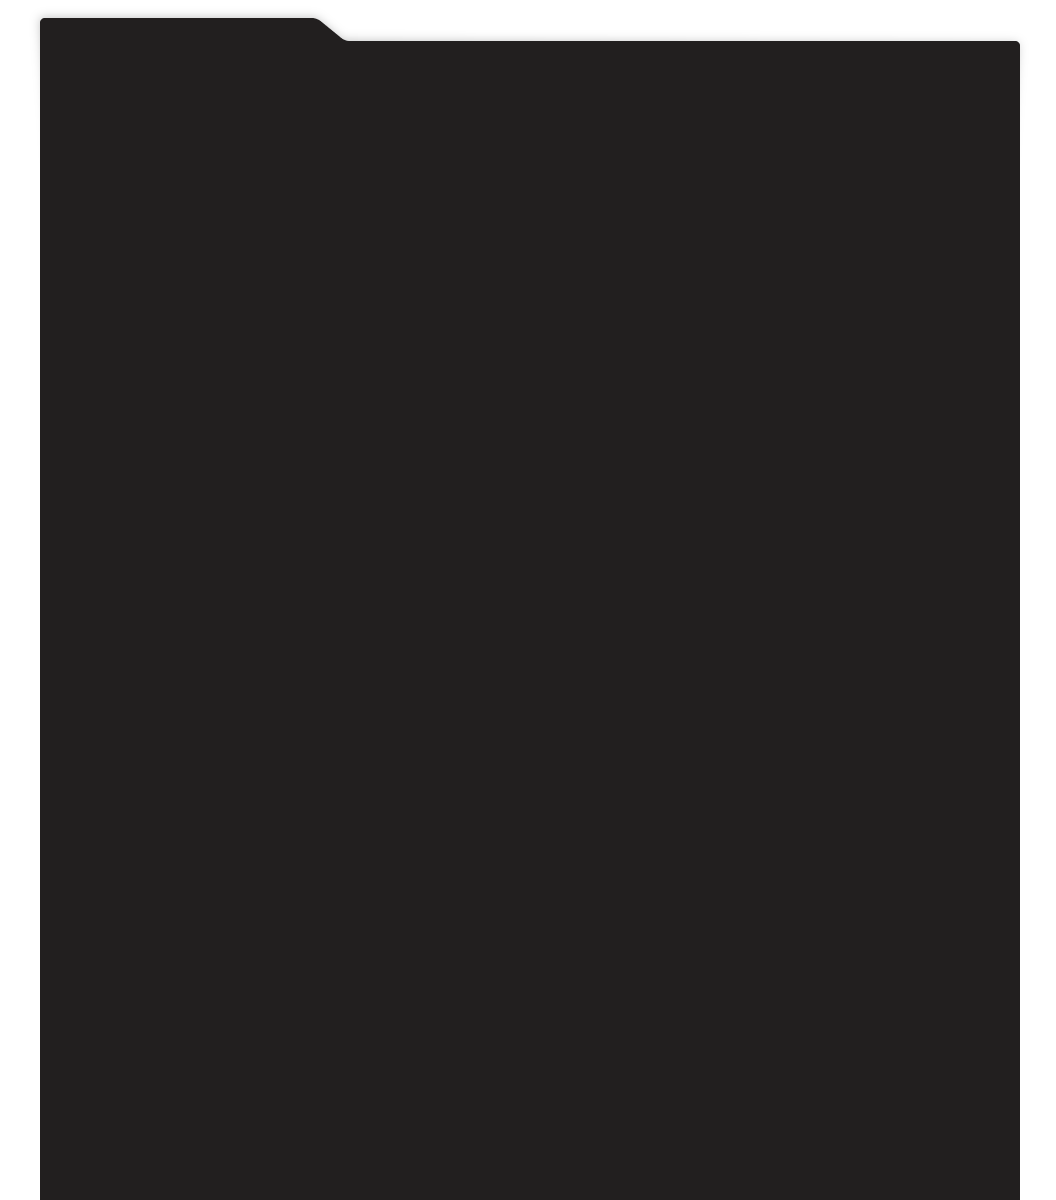
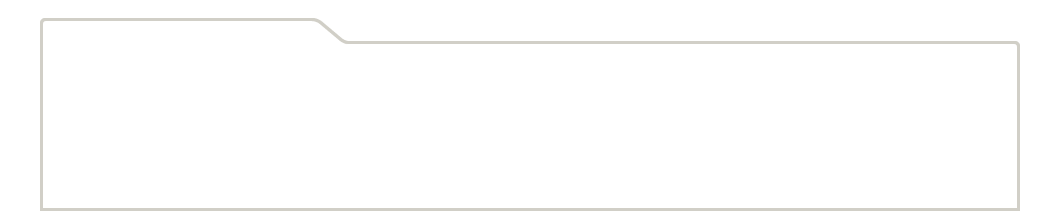
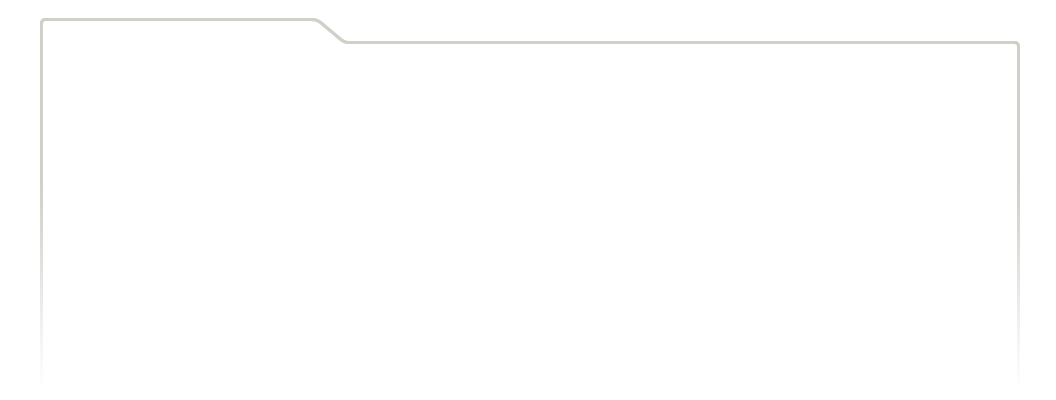
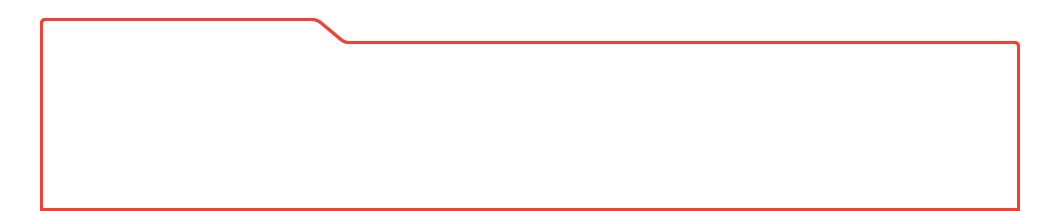
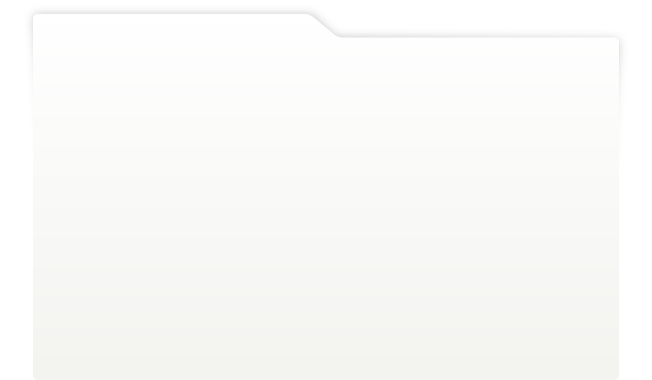
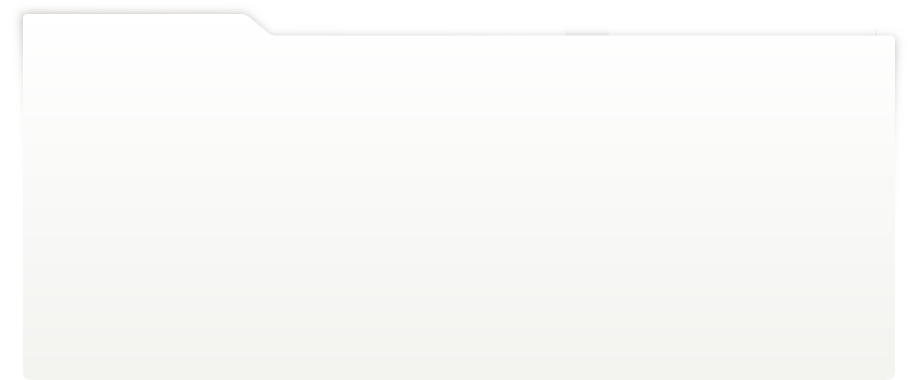
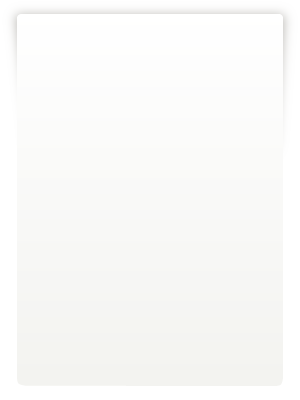
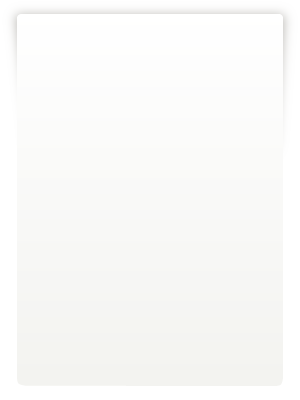
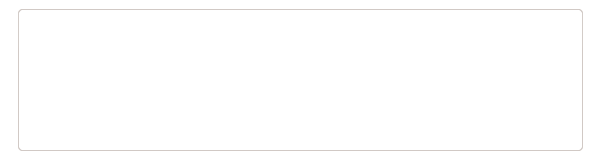
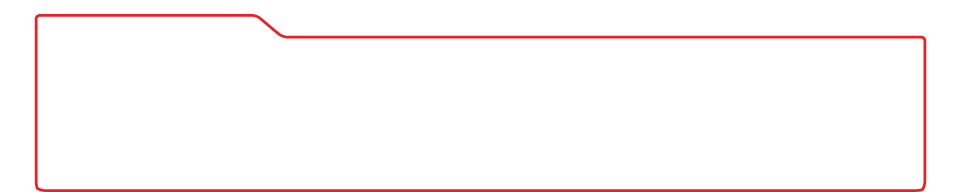
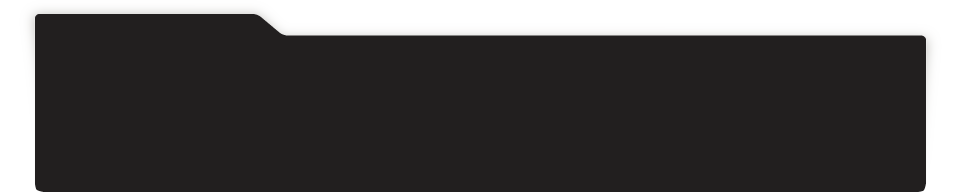
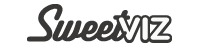
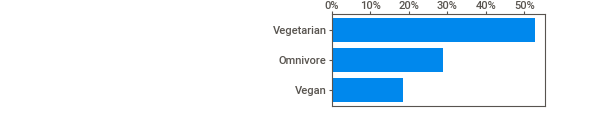
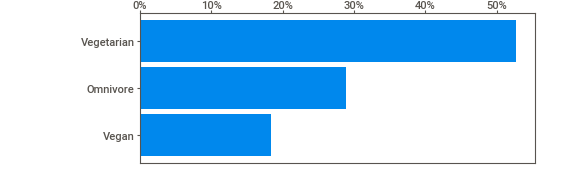
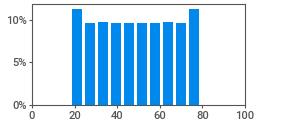
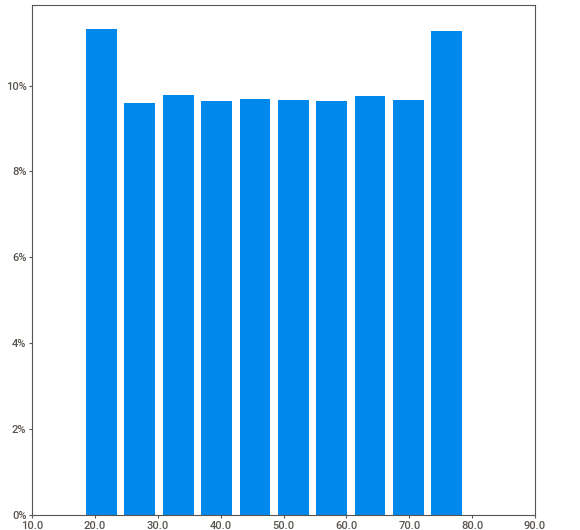
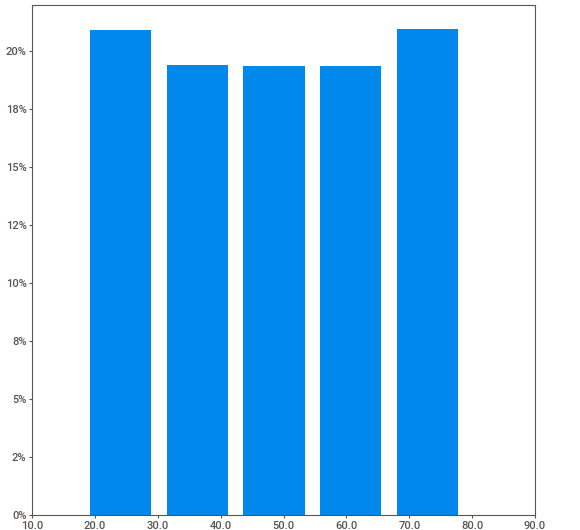
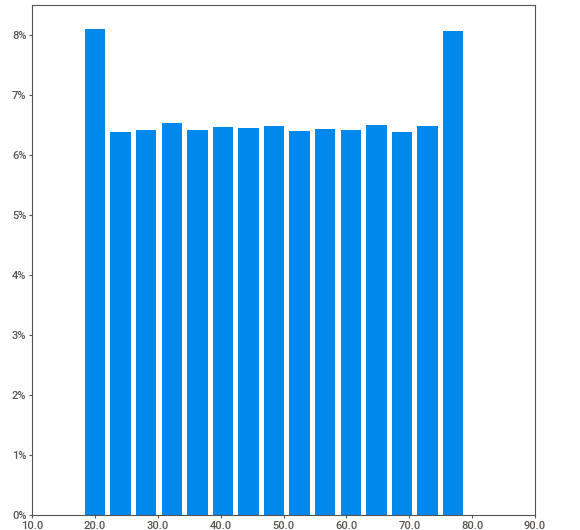
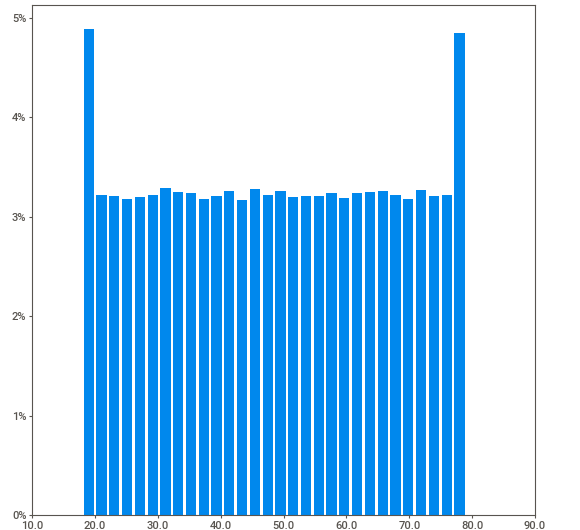
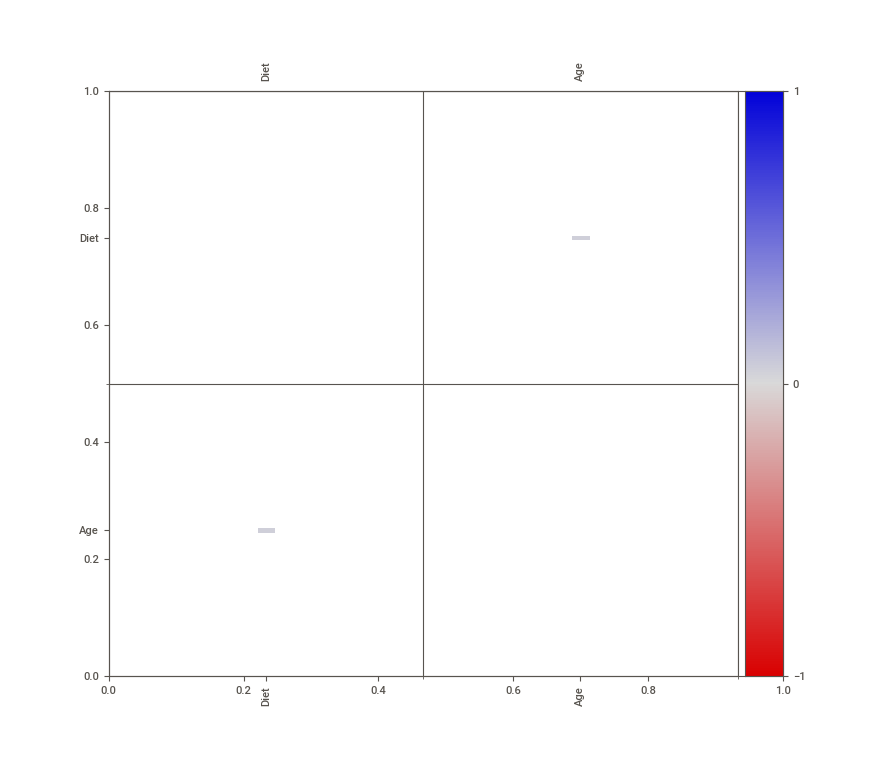
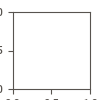

                                             |          | [  0%]   00:00 -> (? left)


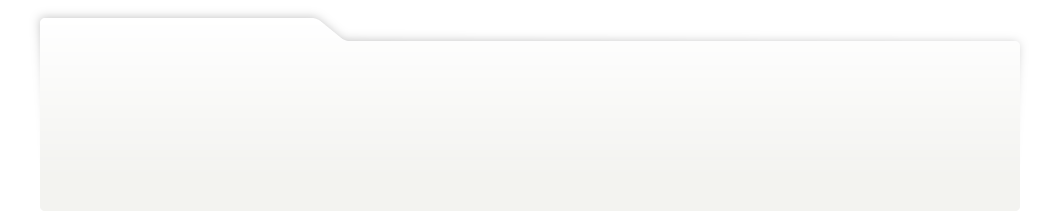
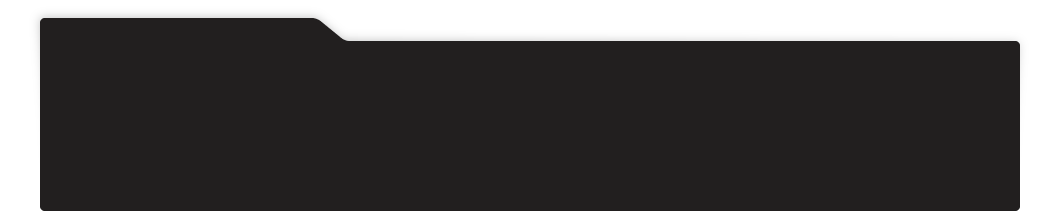
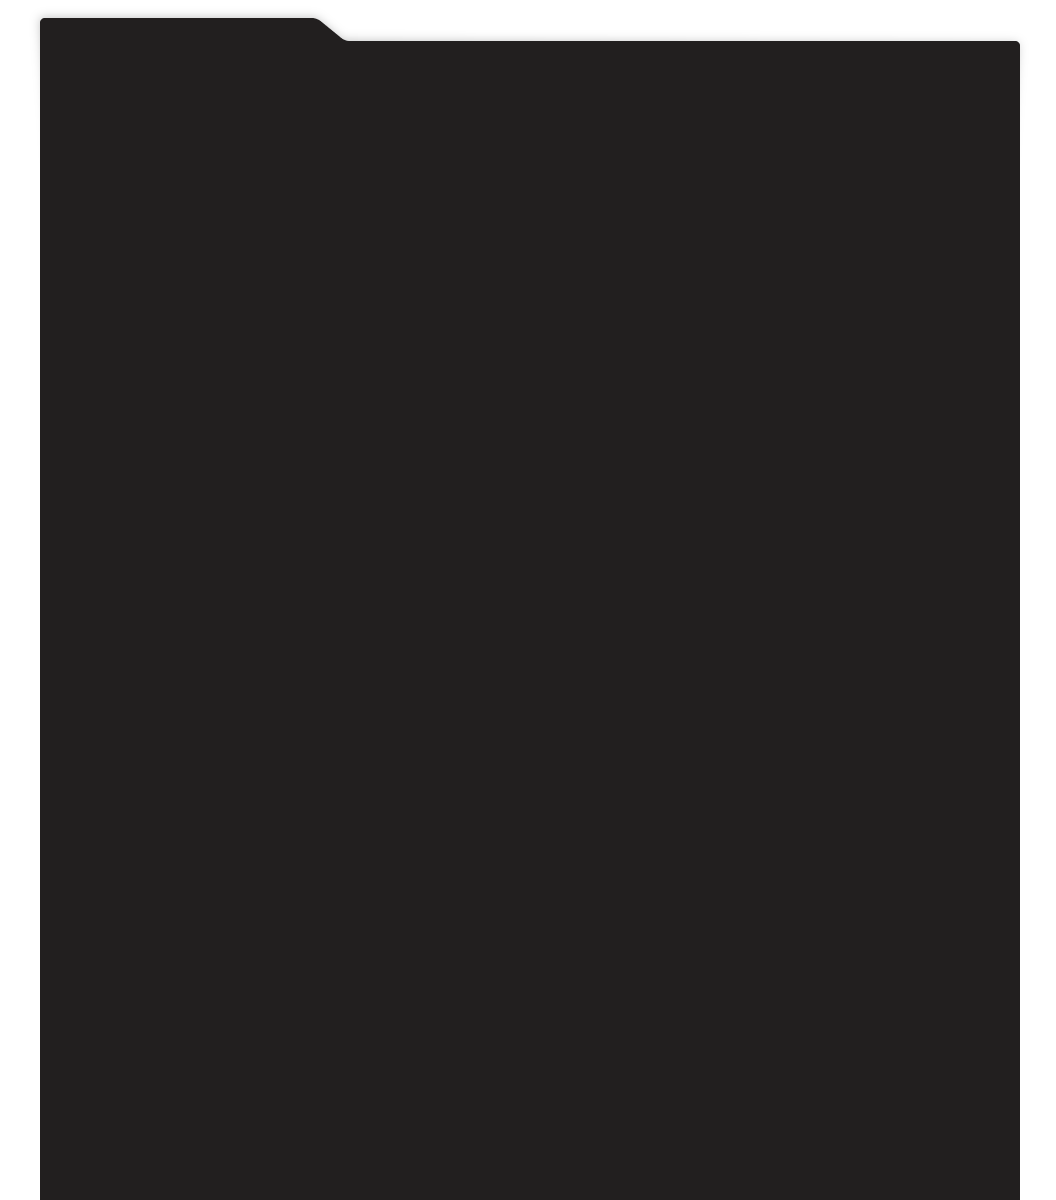
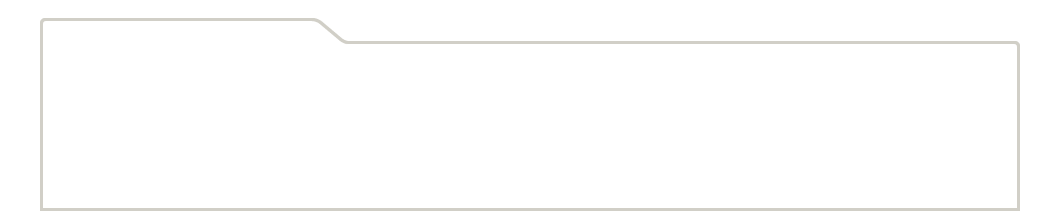
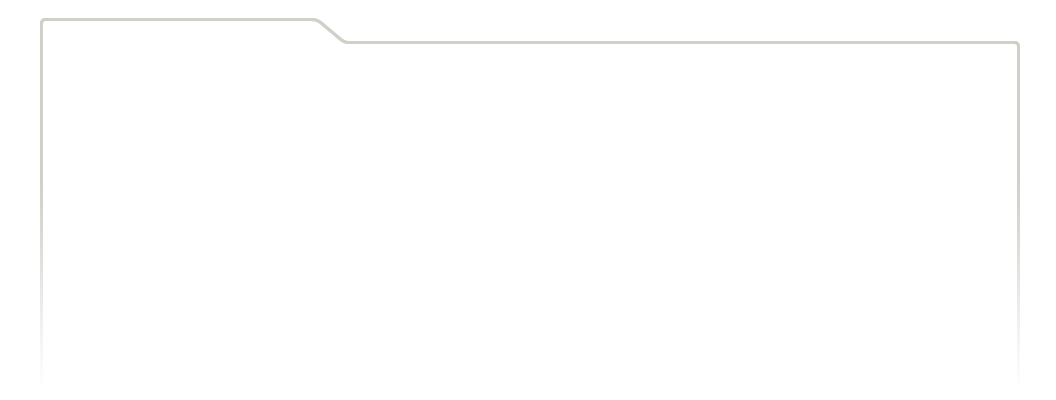
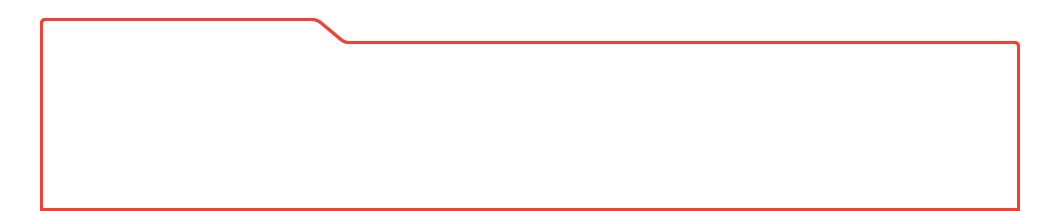
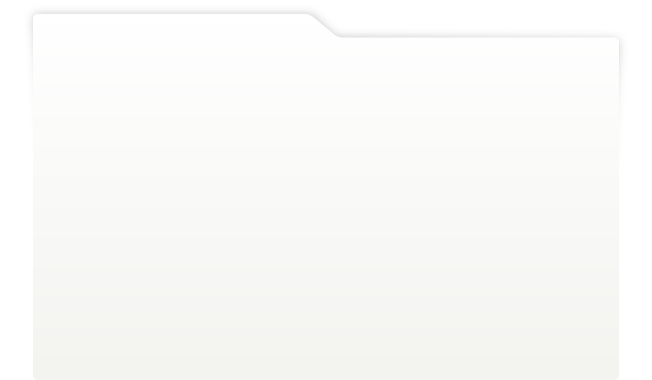
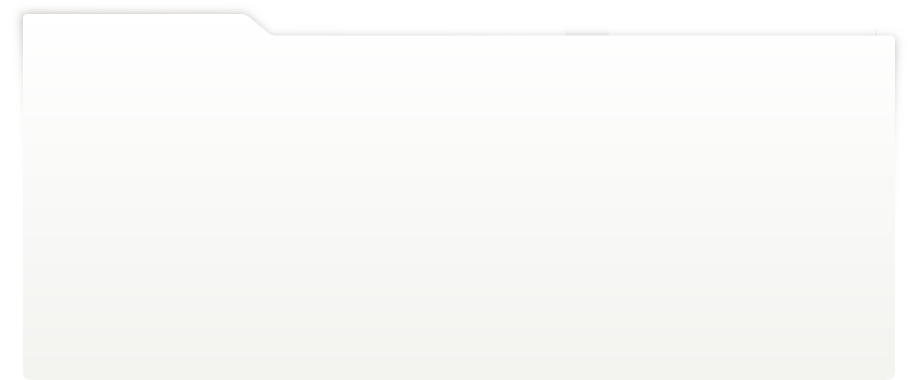
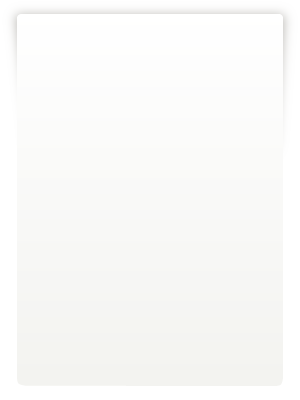
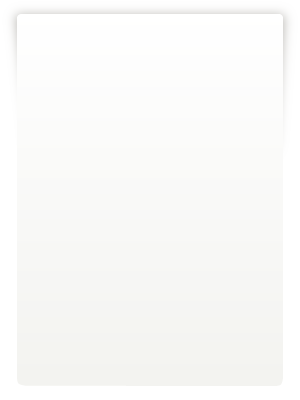
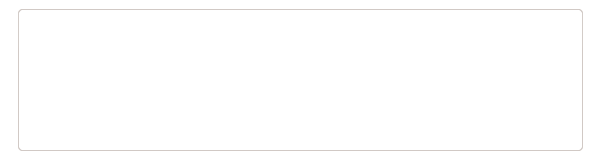
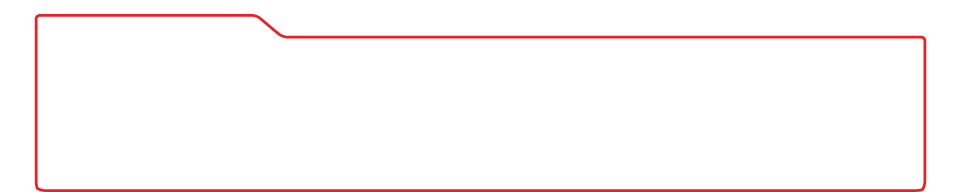
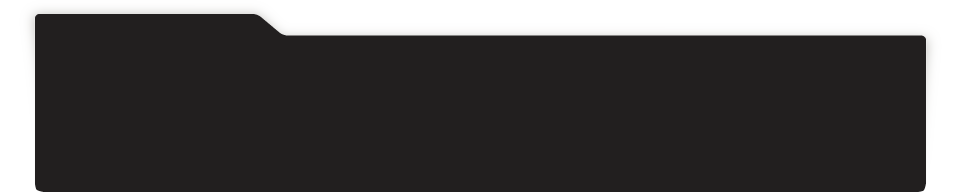
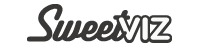
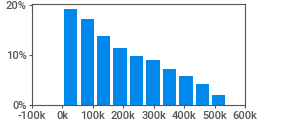
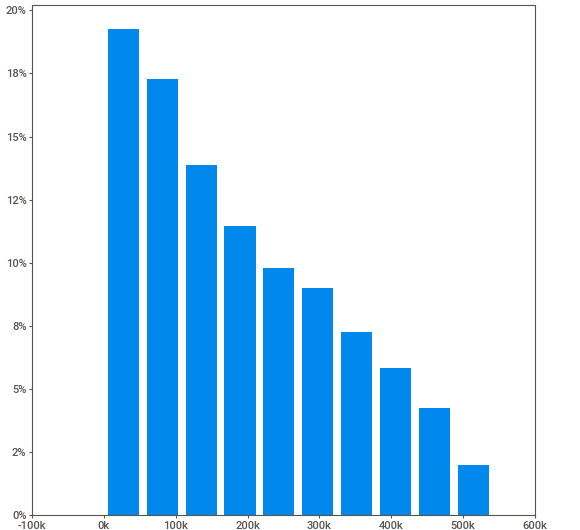
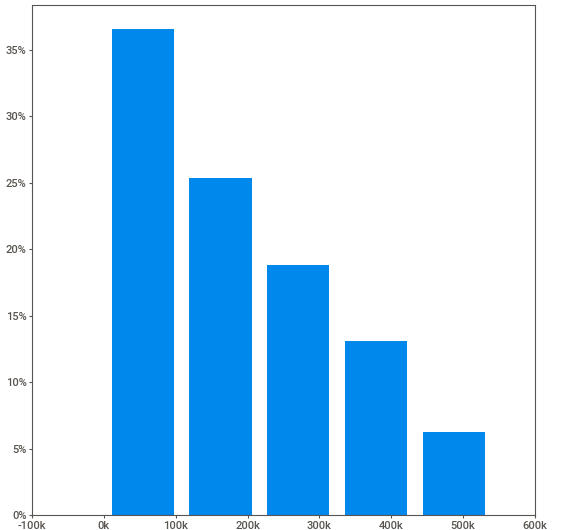
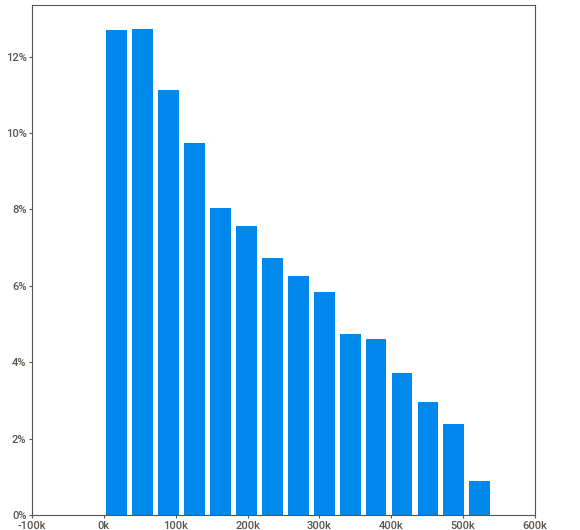
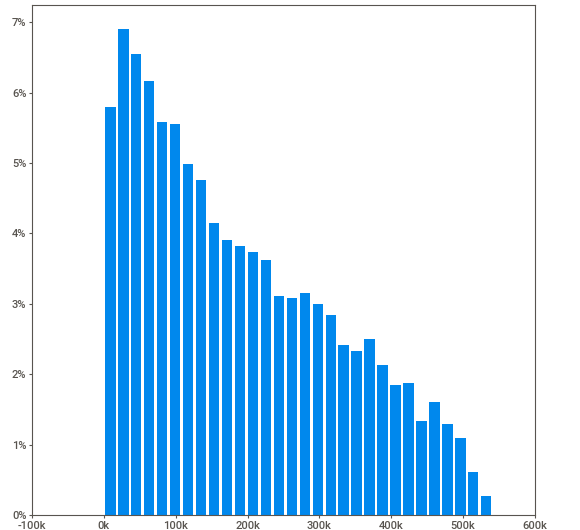
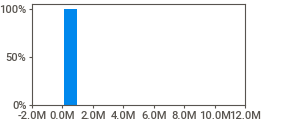
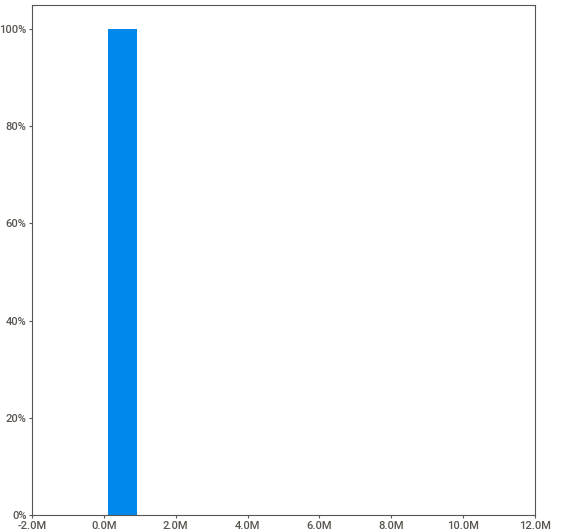
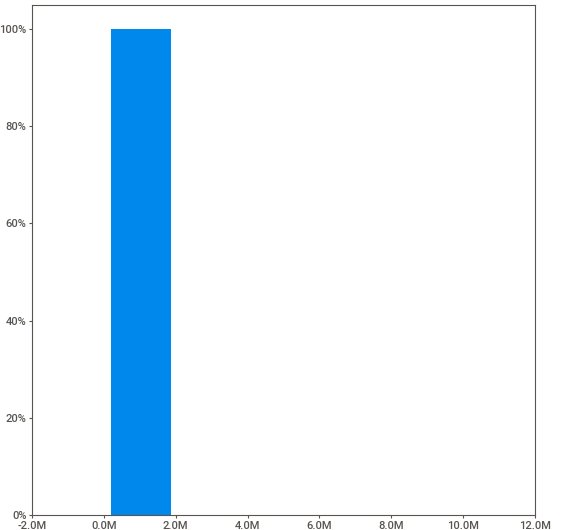
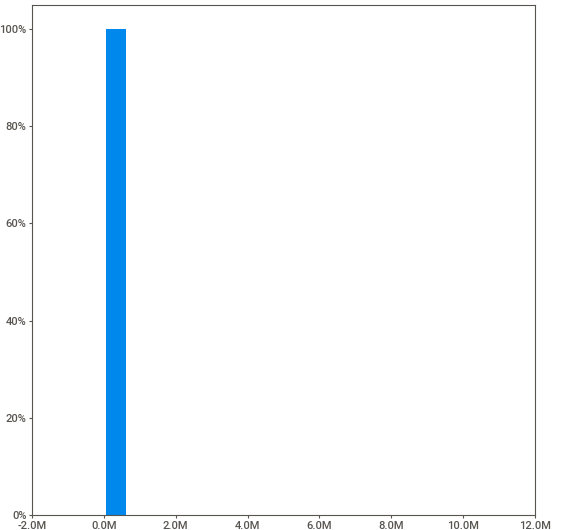
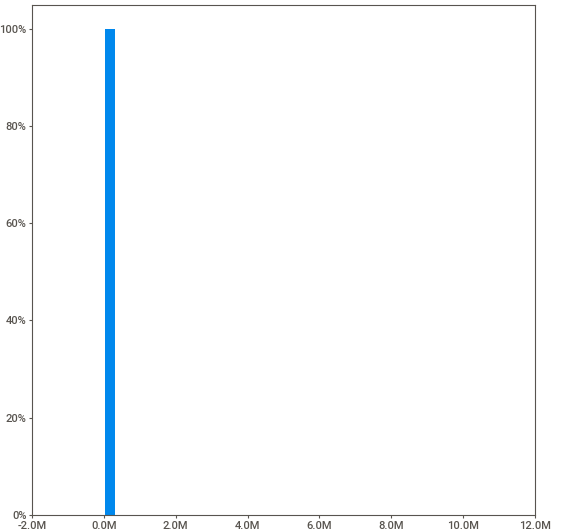
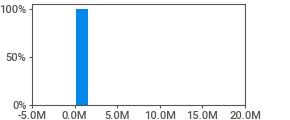
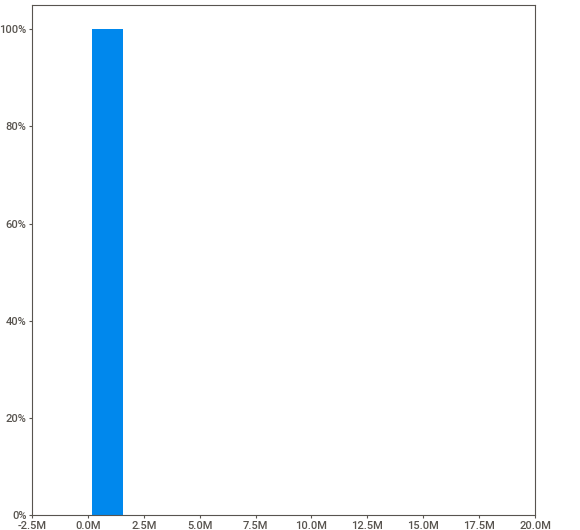
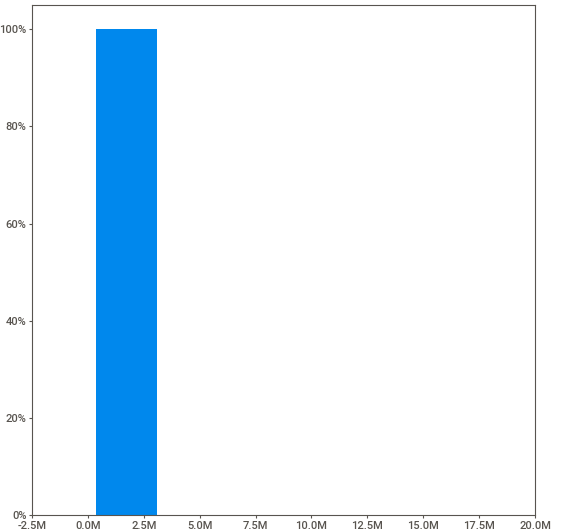
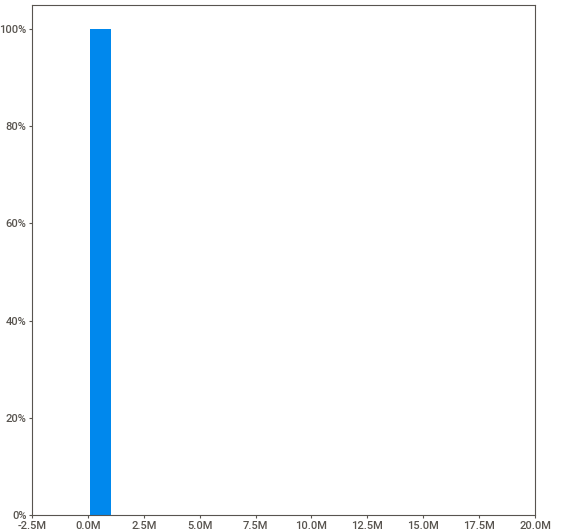
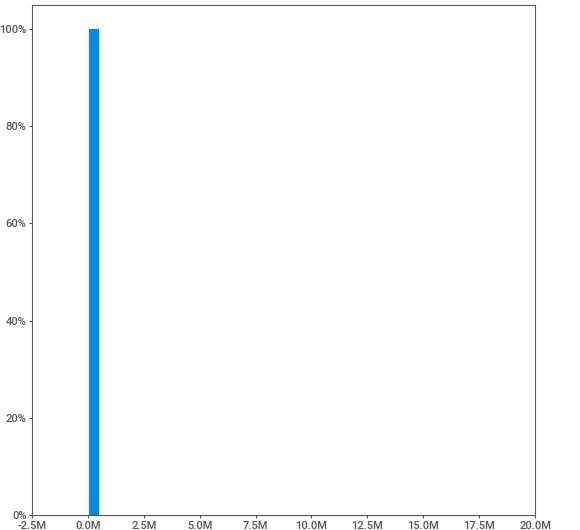
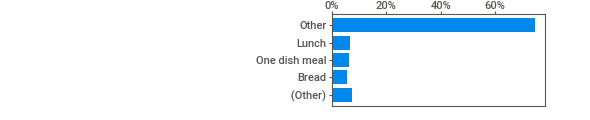
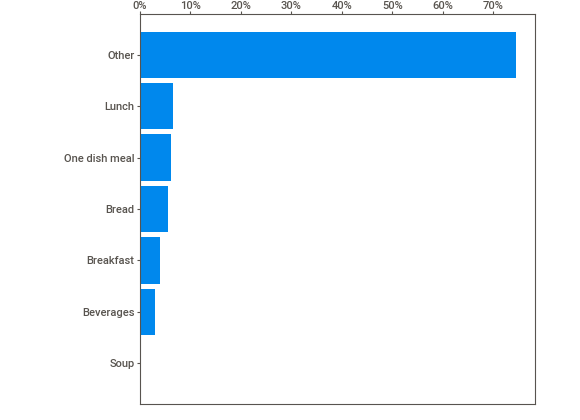
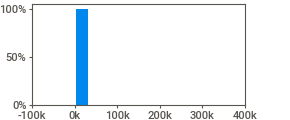
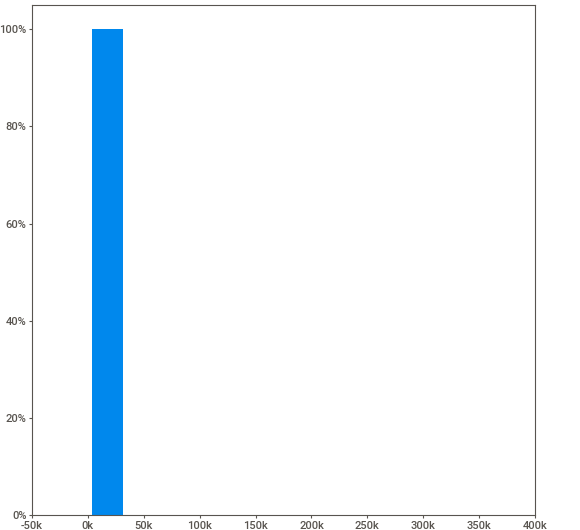
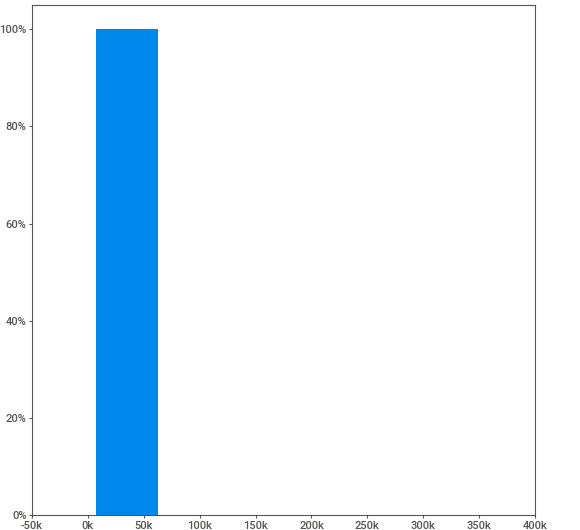
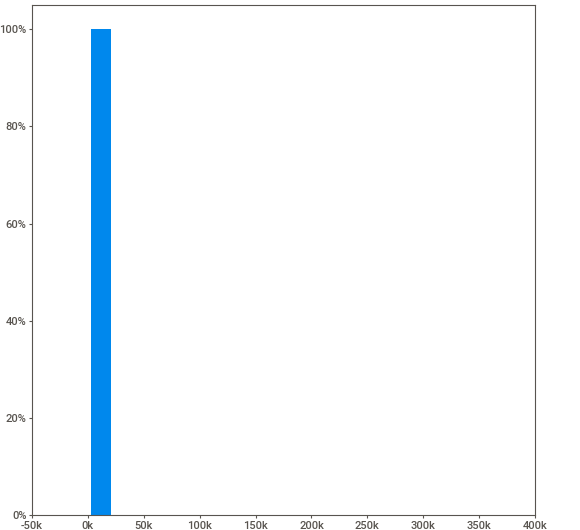
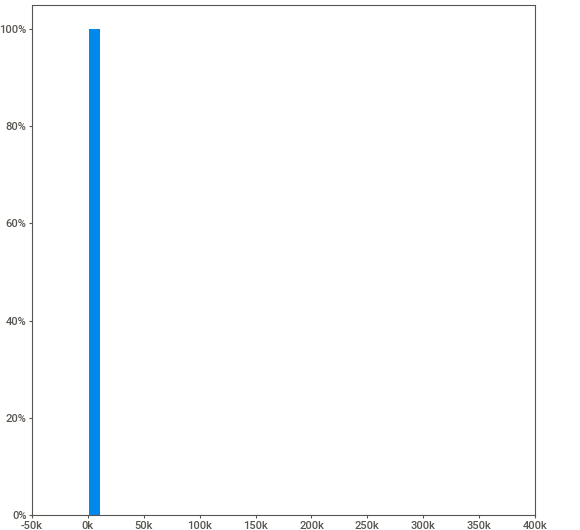
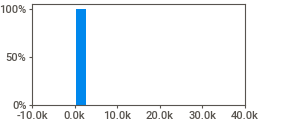
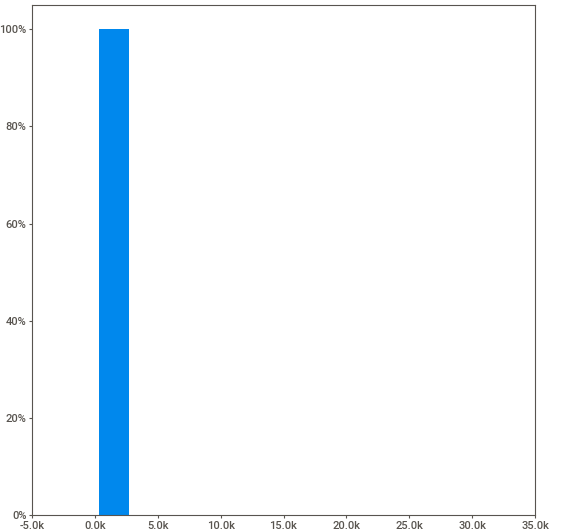
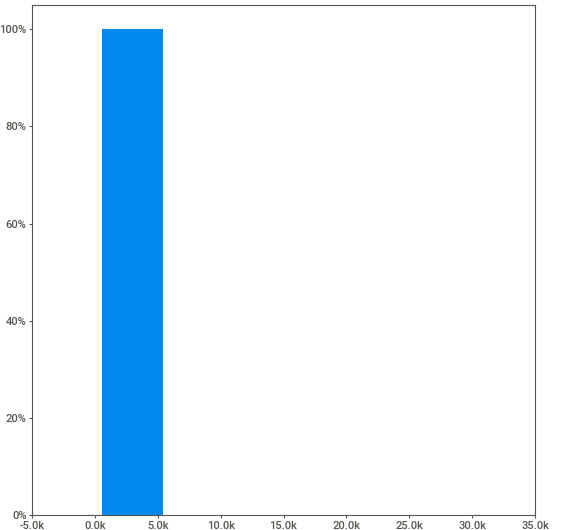
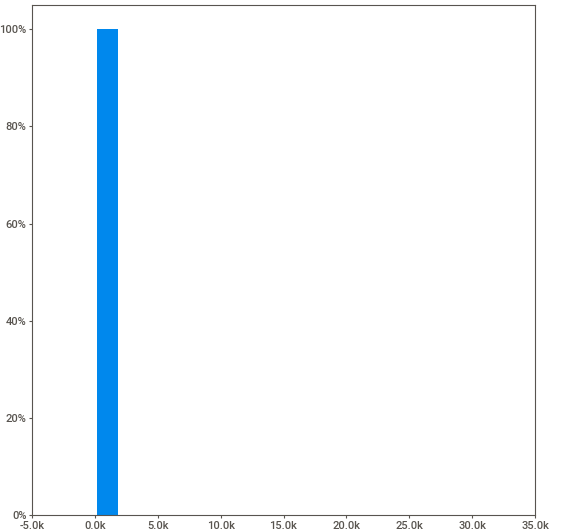
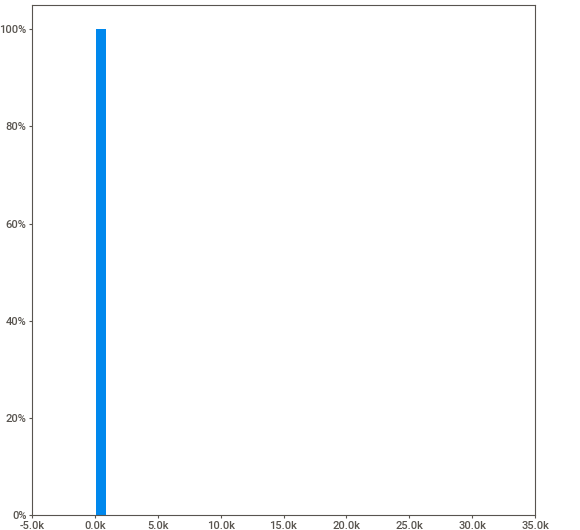
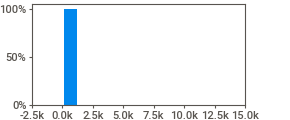
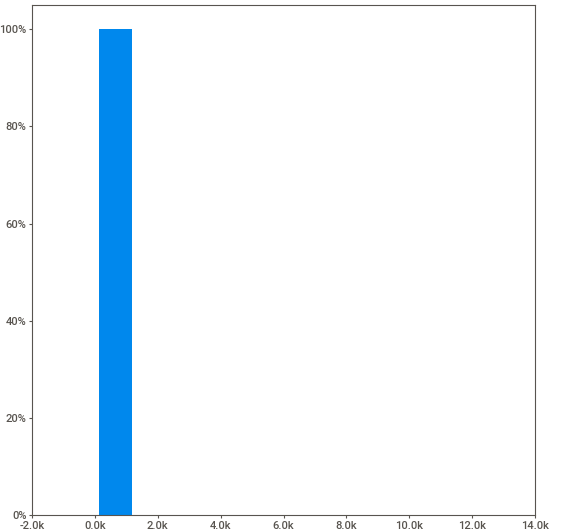
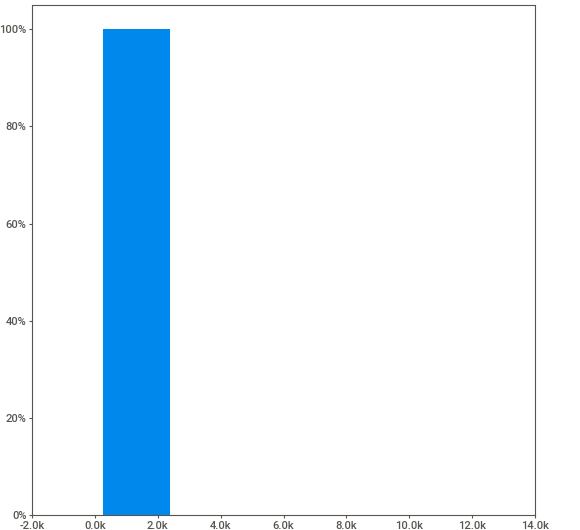
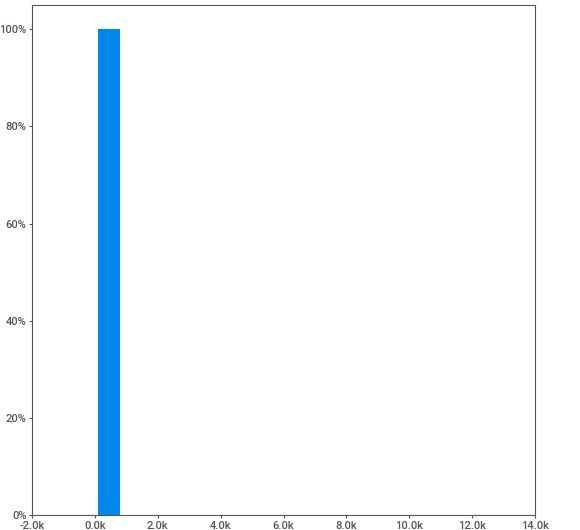
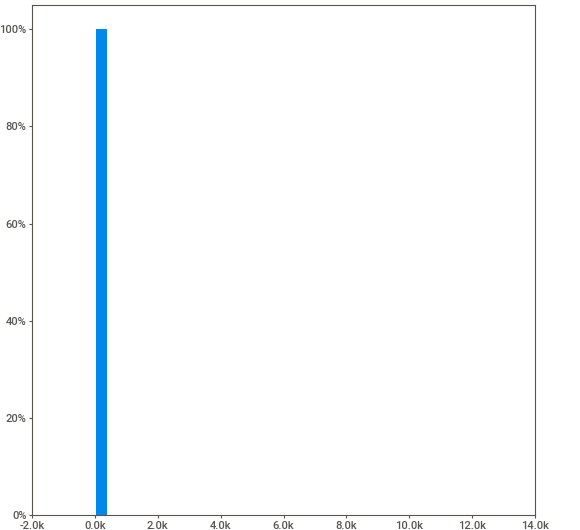
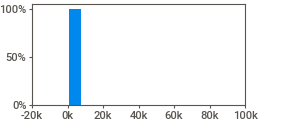
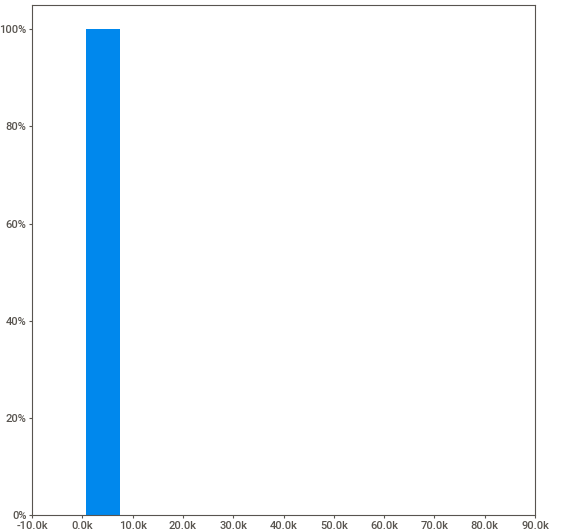
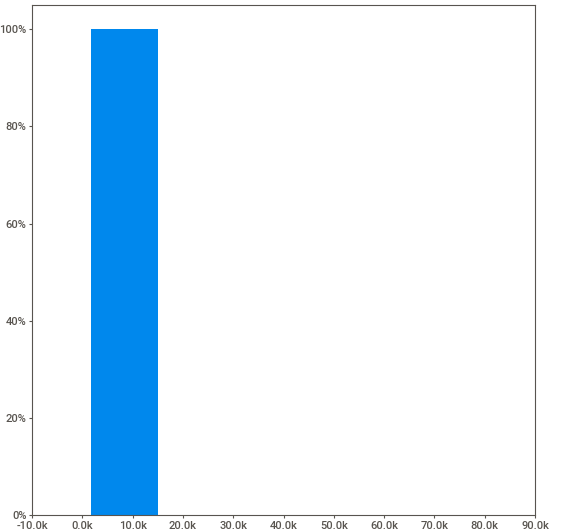
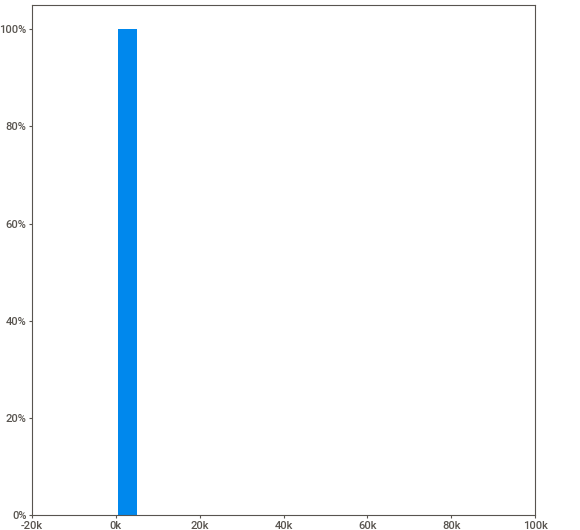
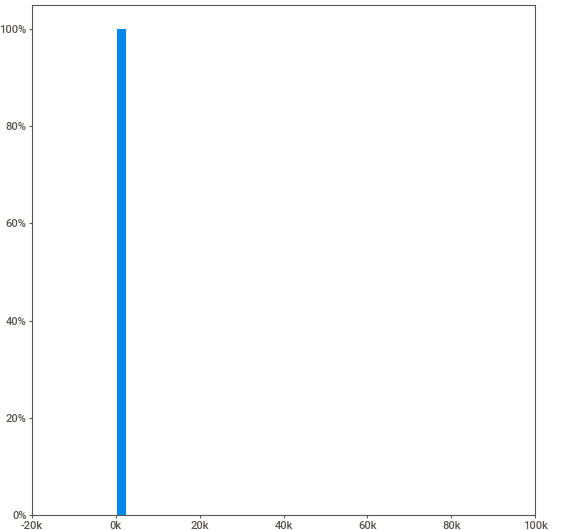
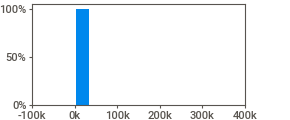
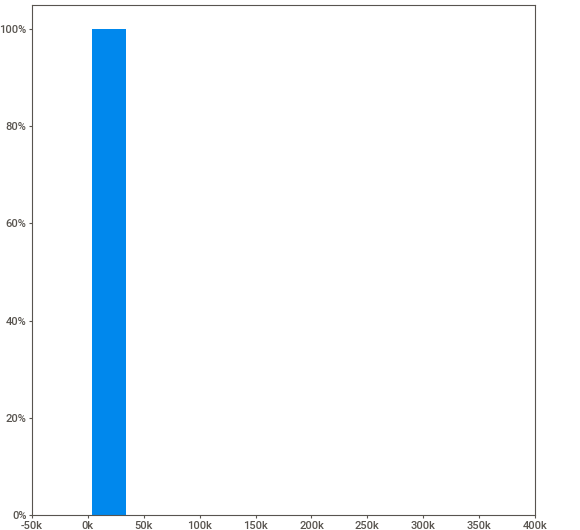
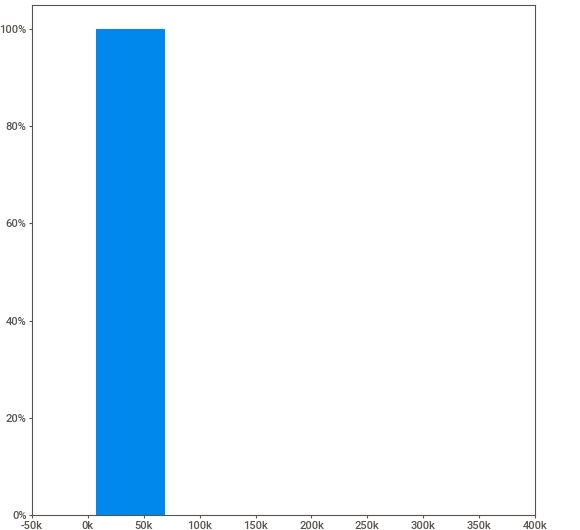
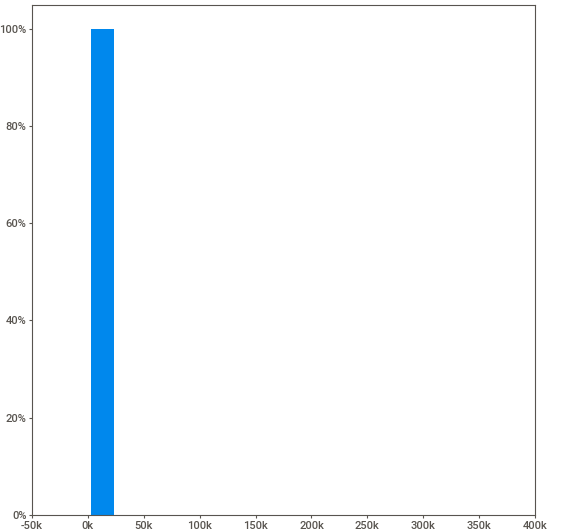
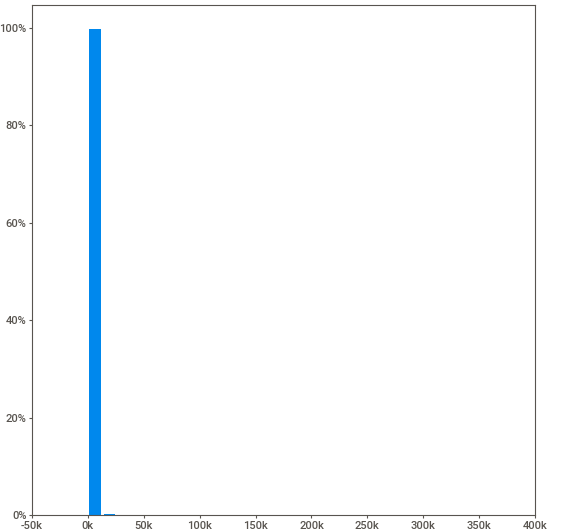
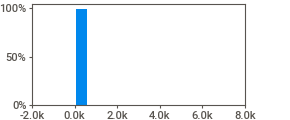
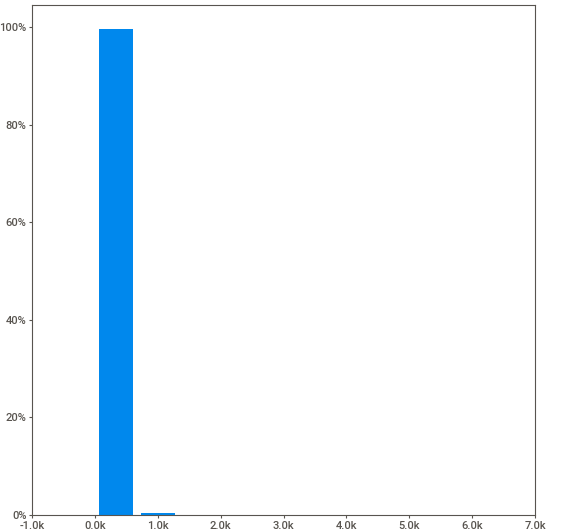
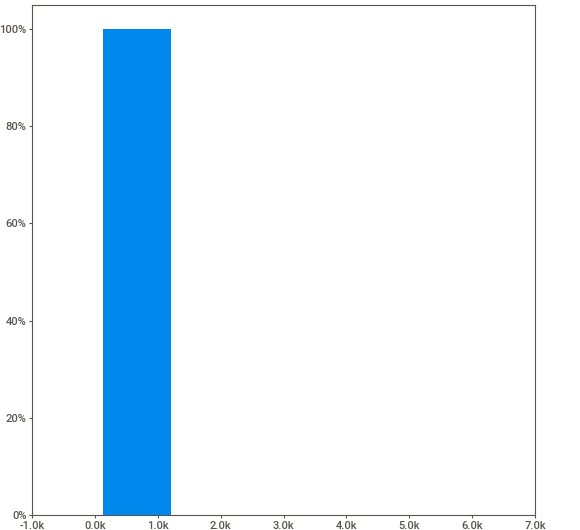
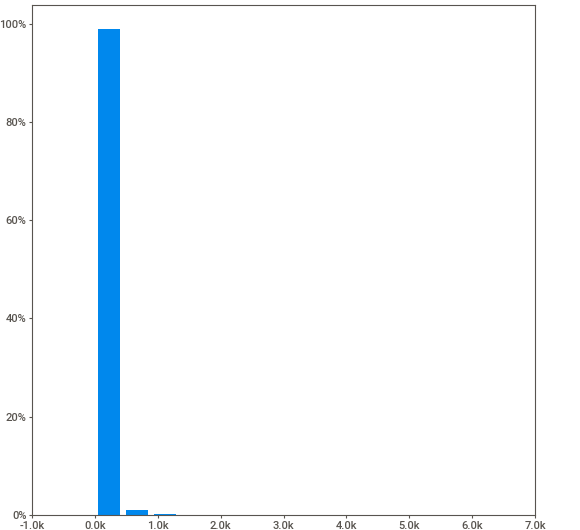
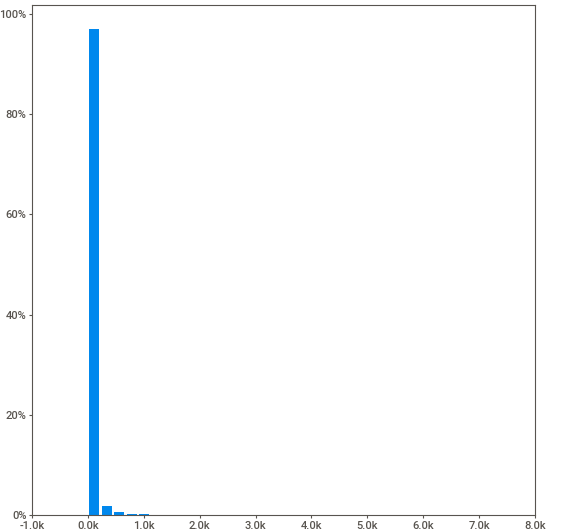
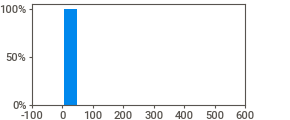
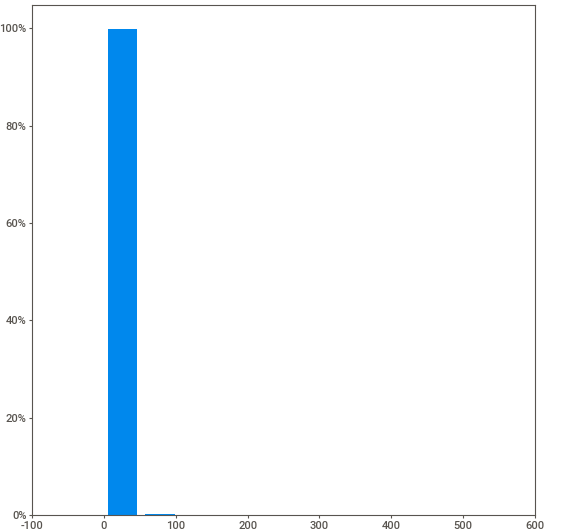
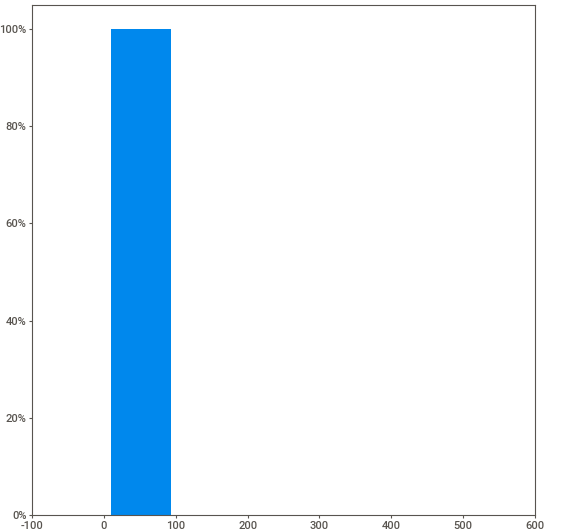
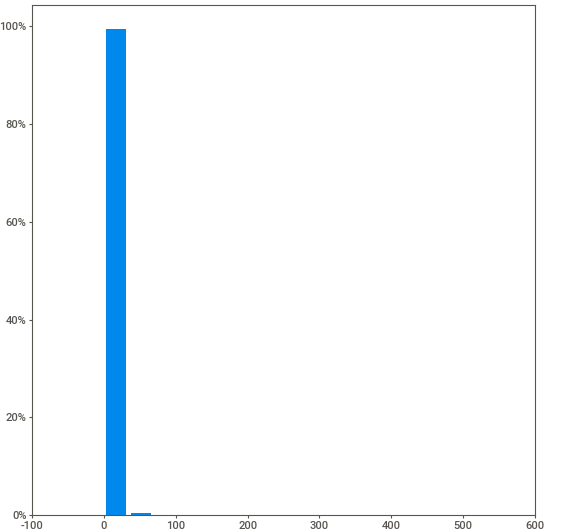
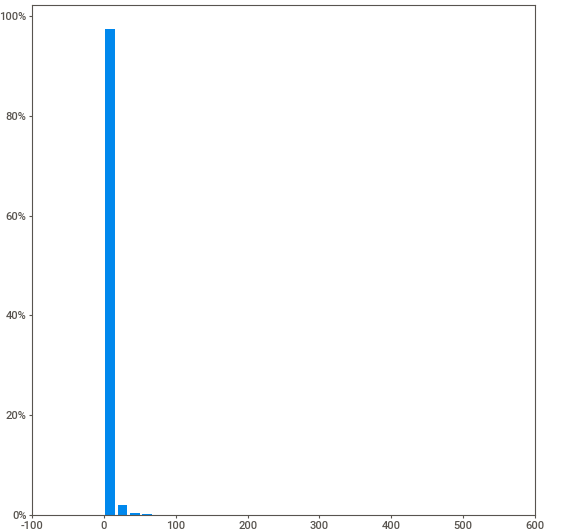
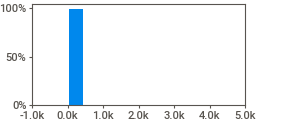
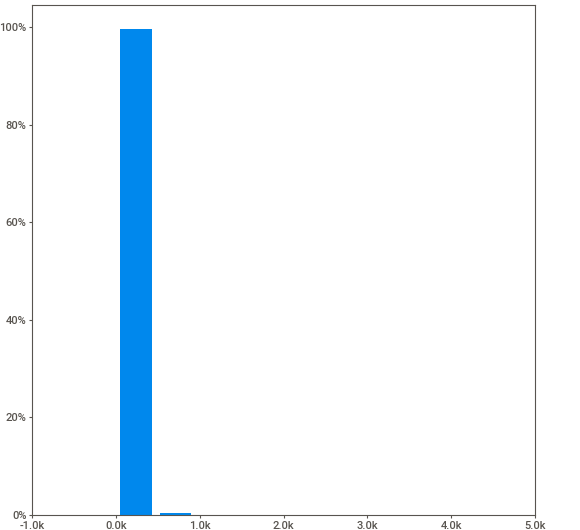
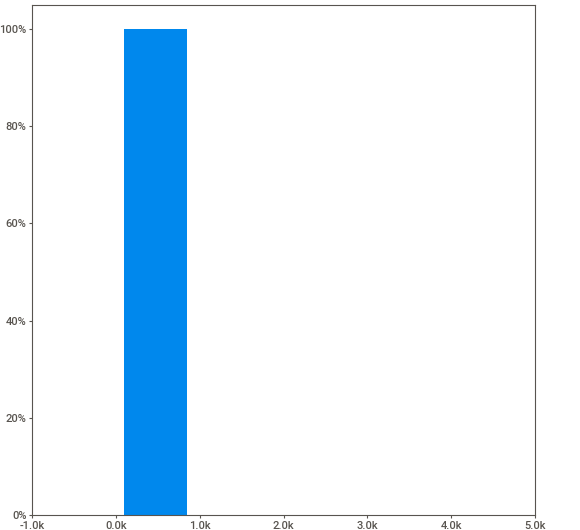
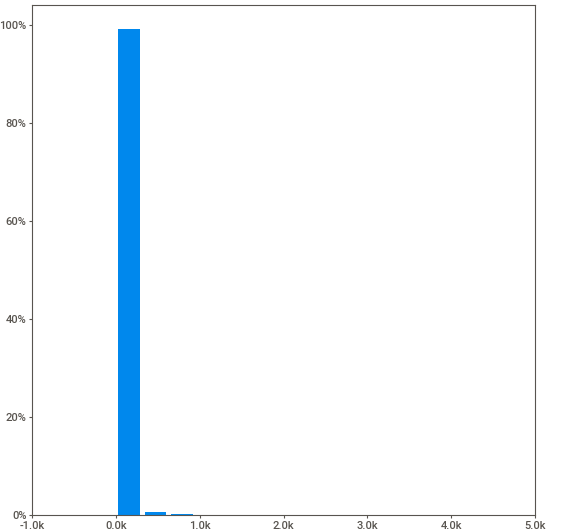
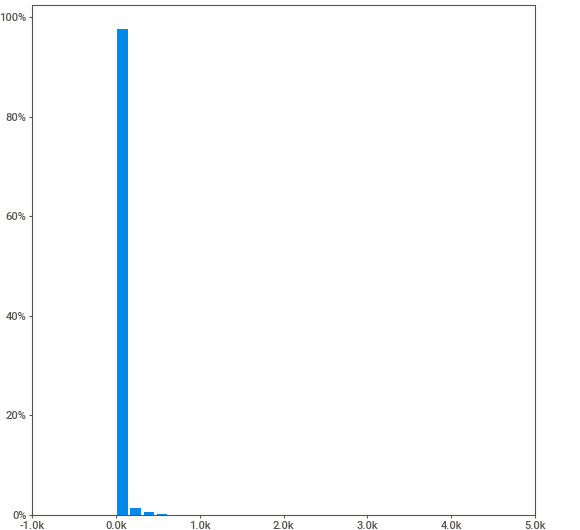
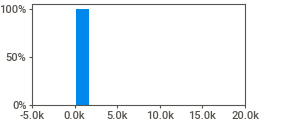
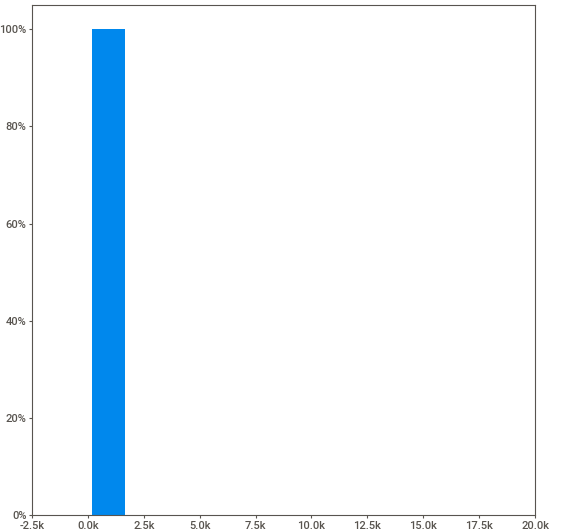
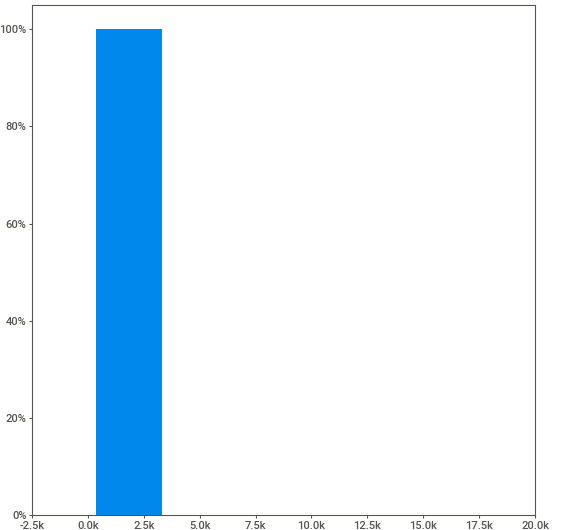
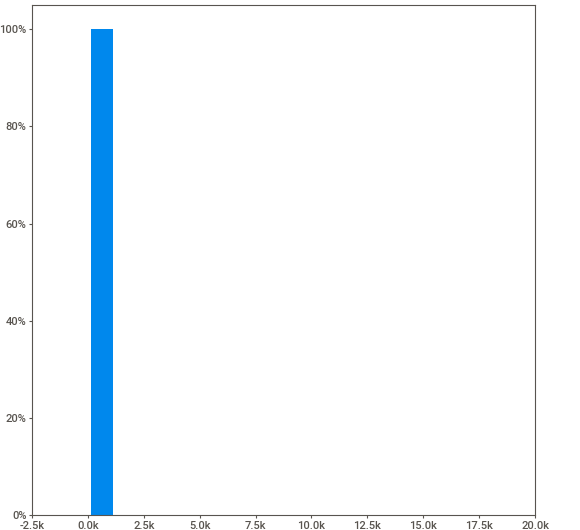
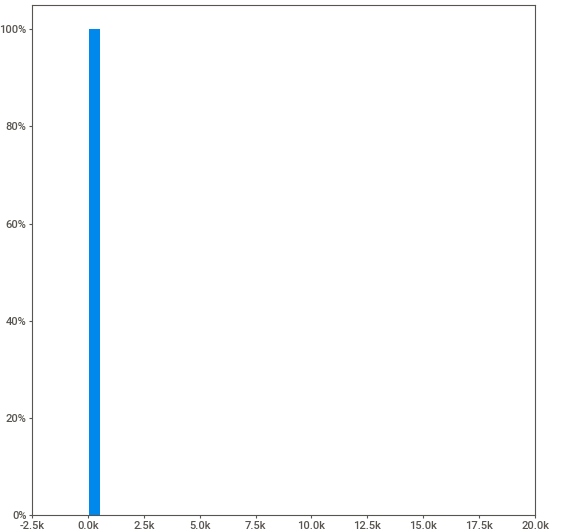
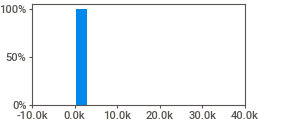
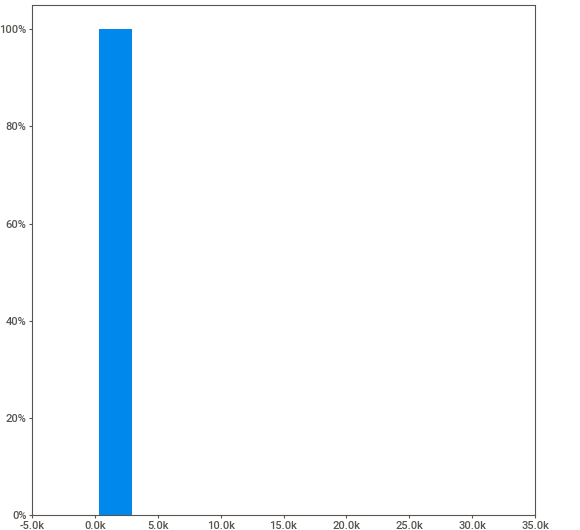
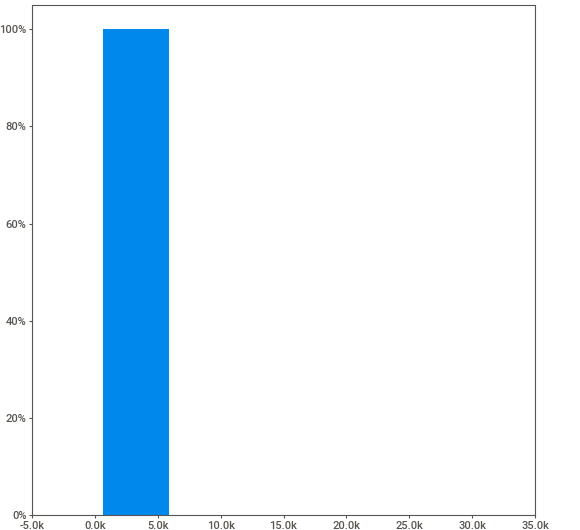
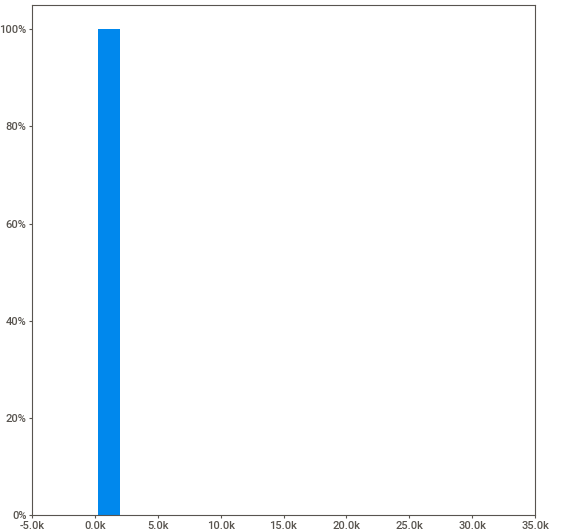
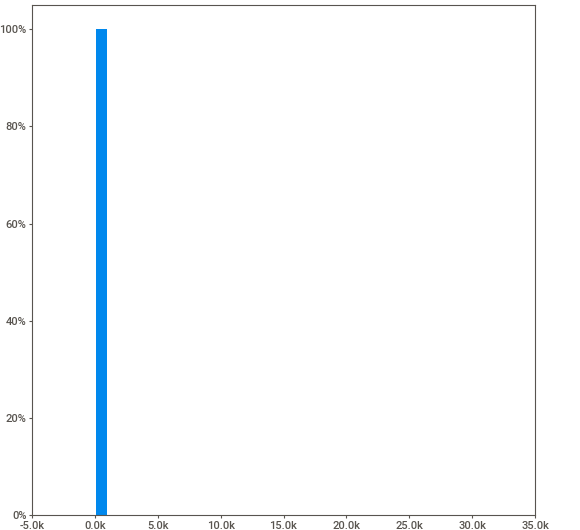
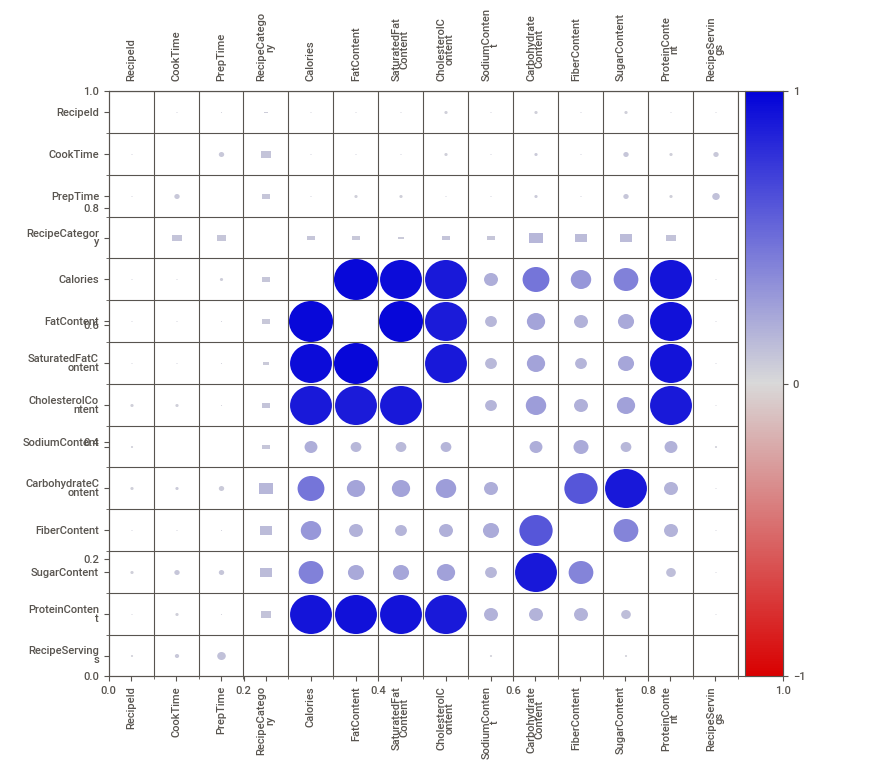
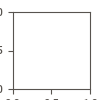

                                             |          | [  0%]   00:00 -> (? left)


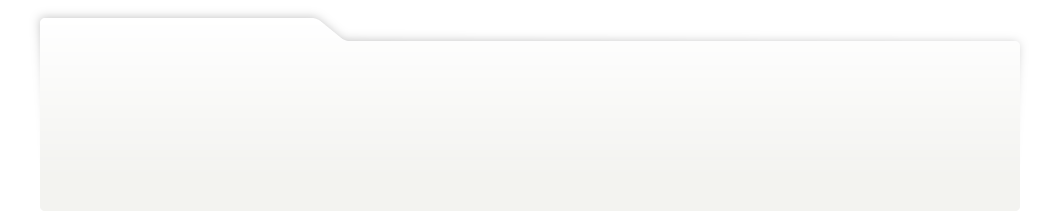
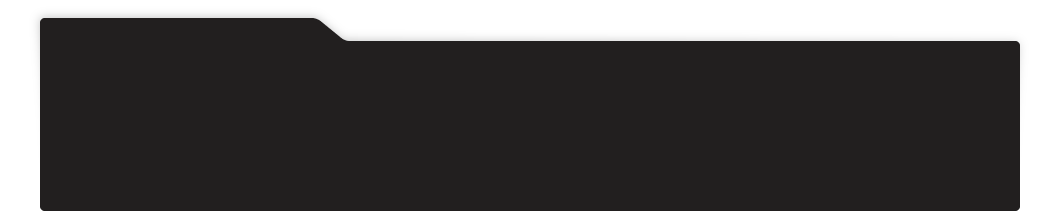
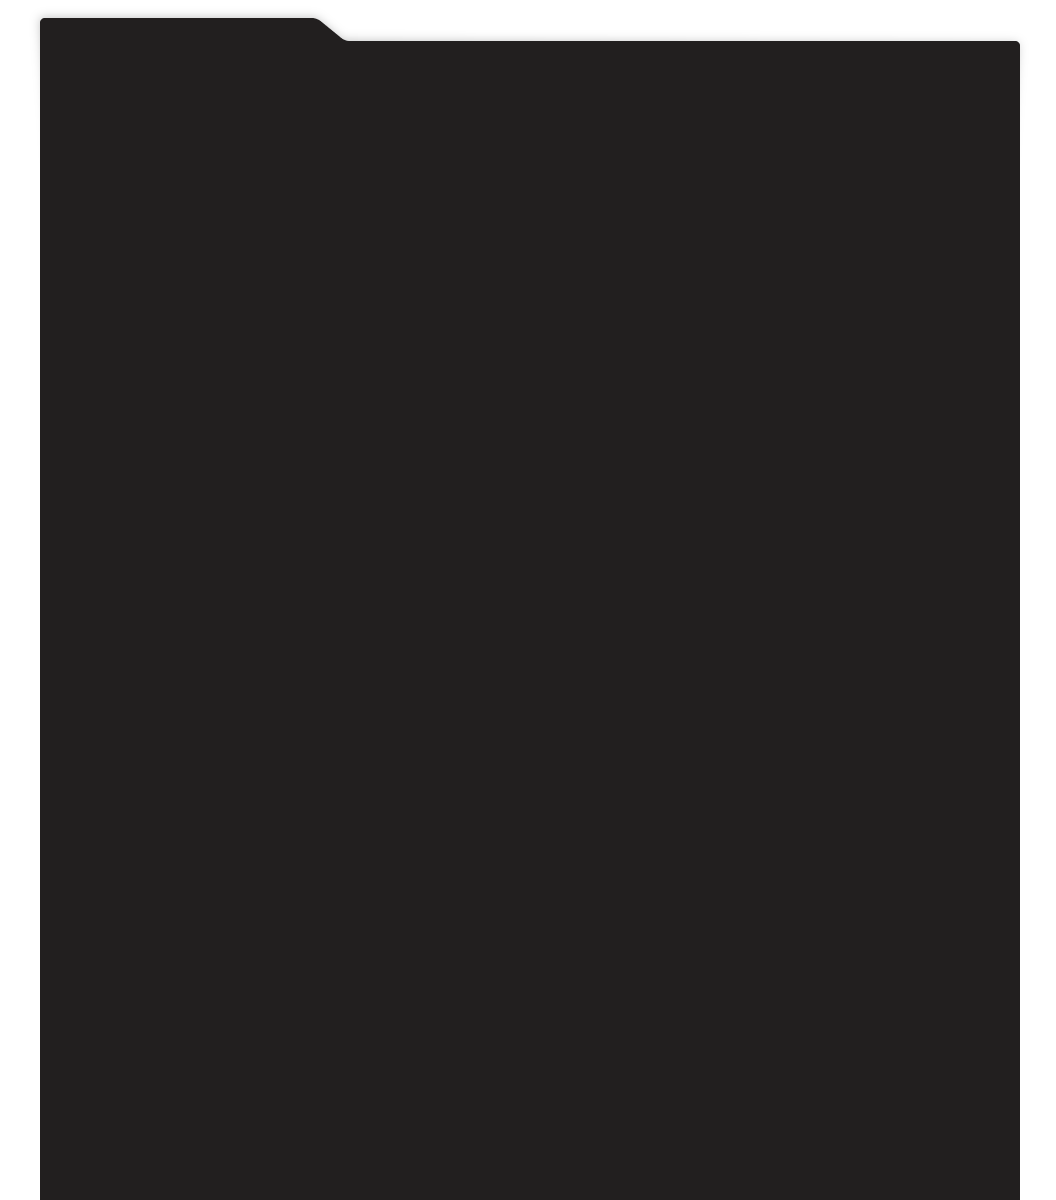
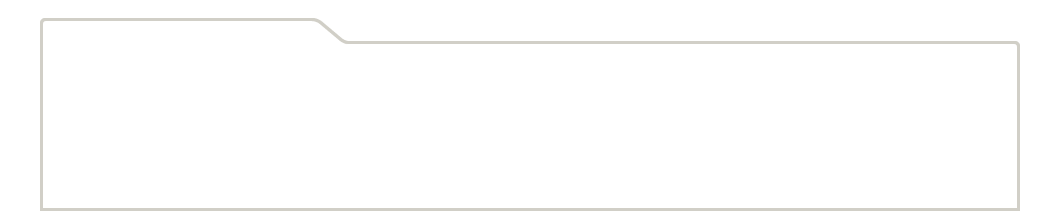
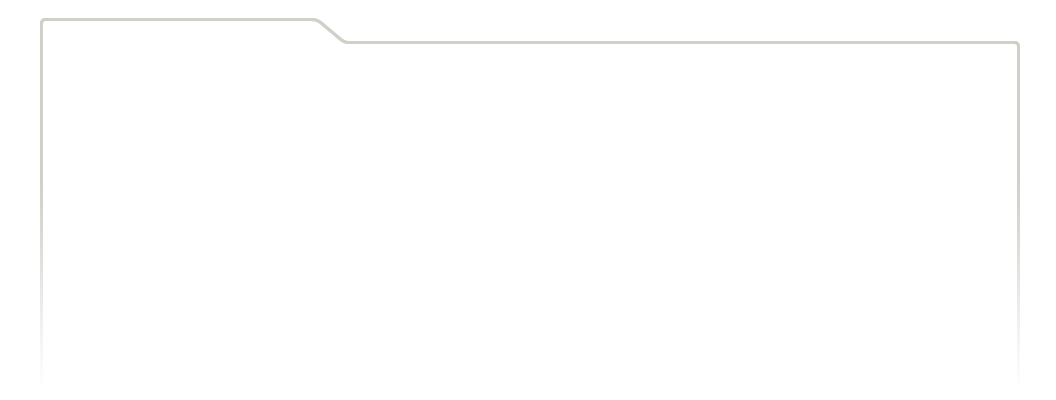
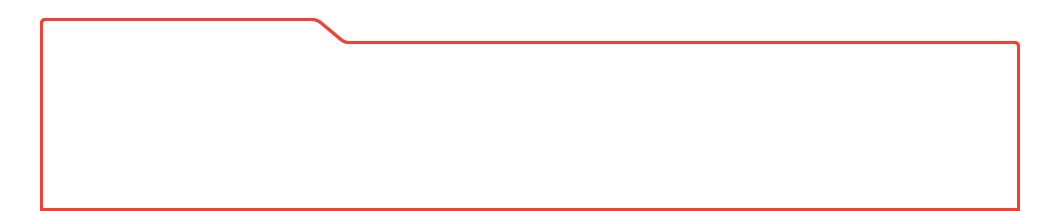
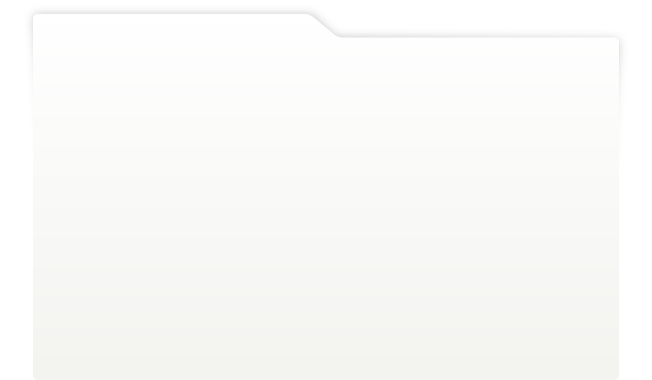
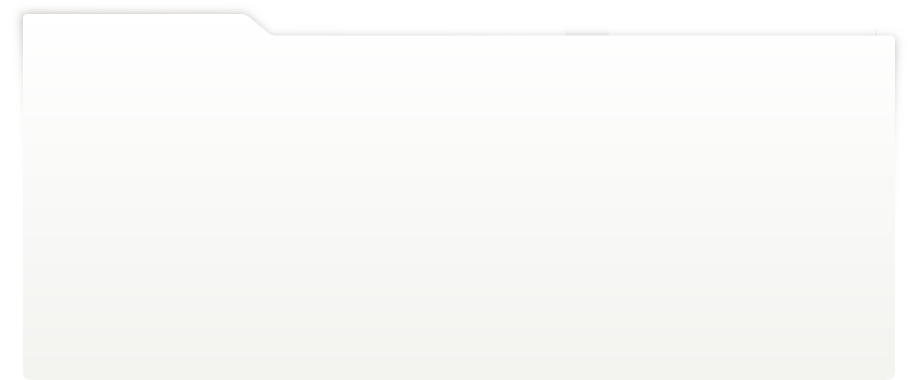
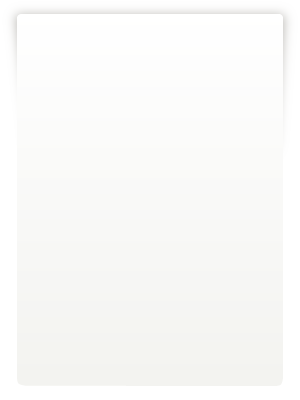
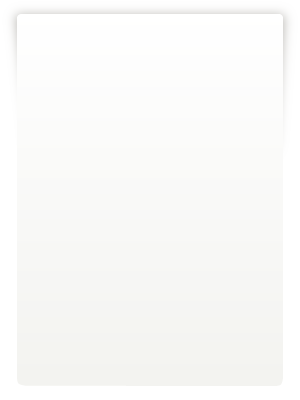
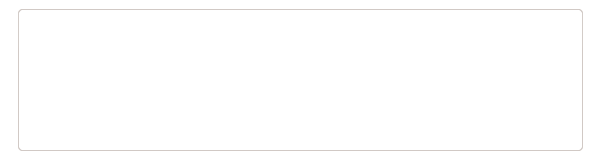
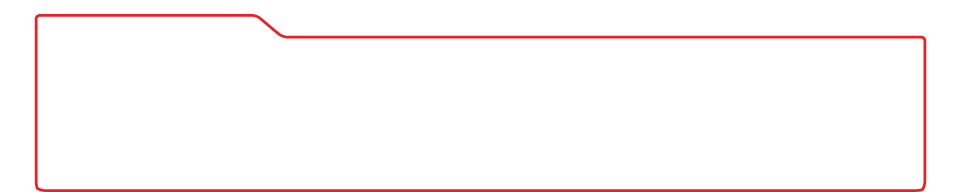
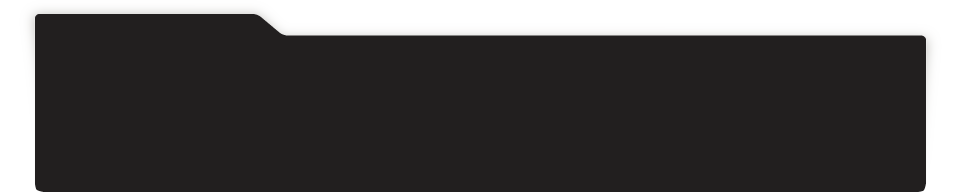
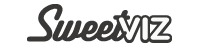
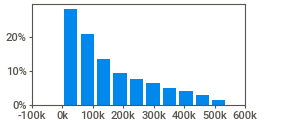
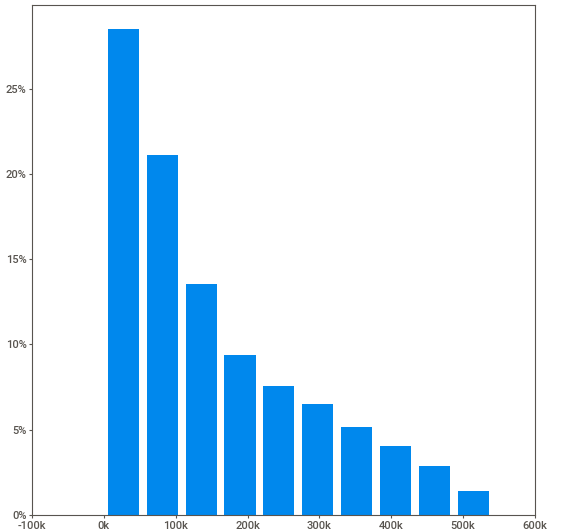
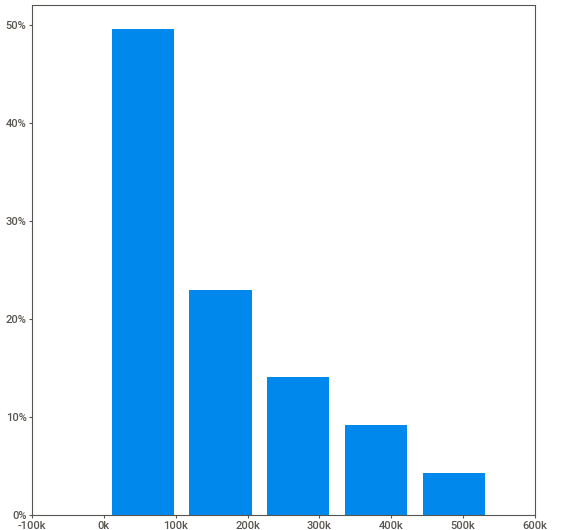
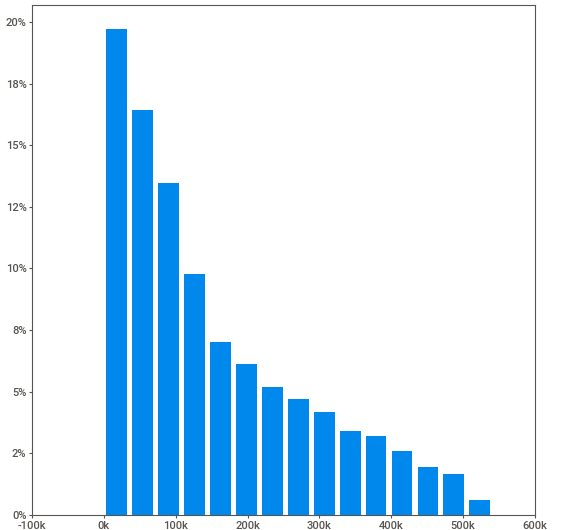
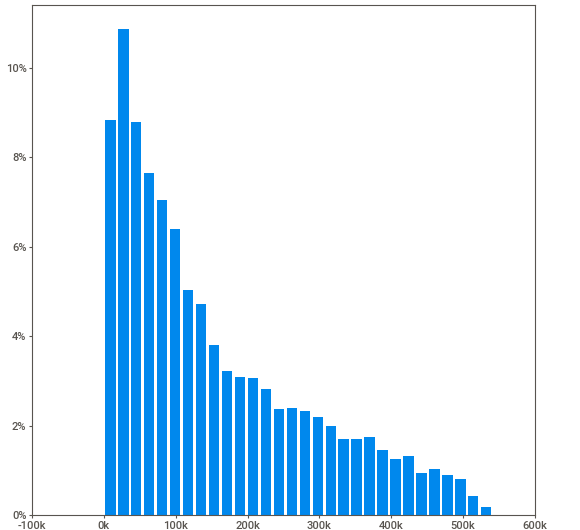
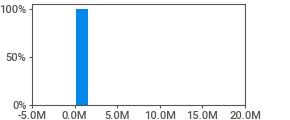
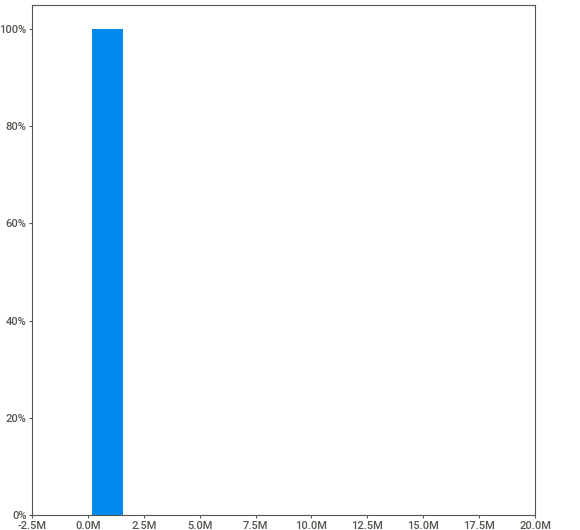
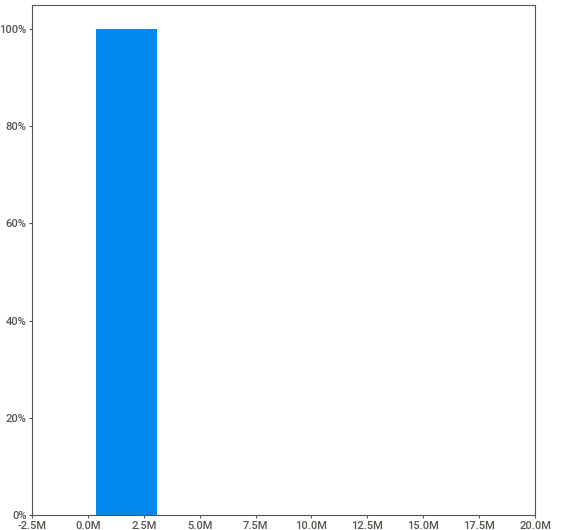
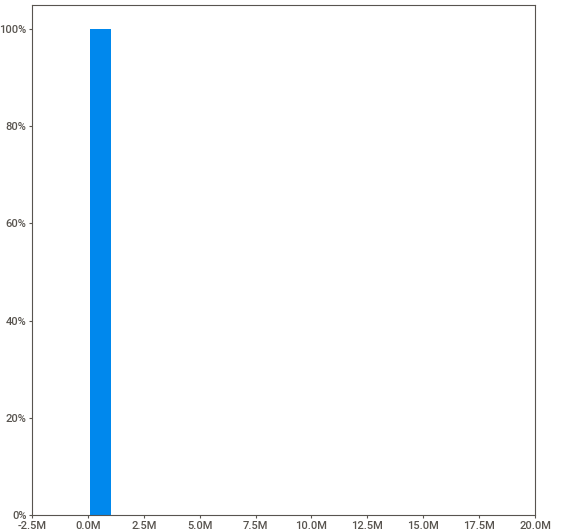
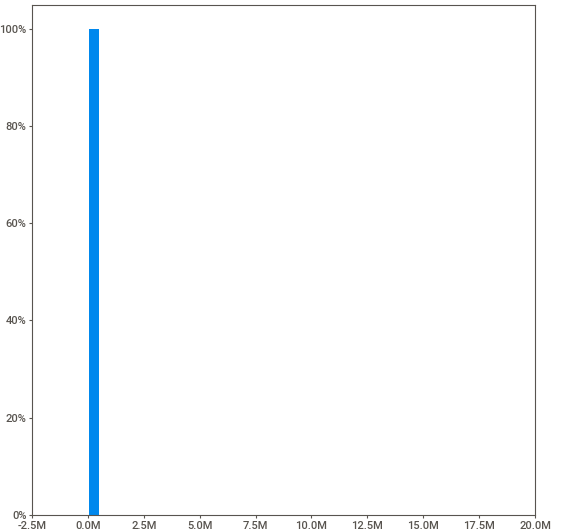
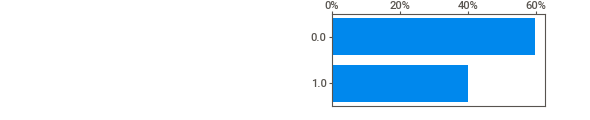
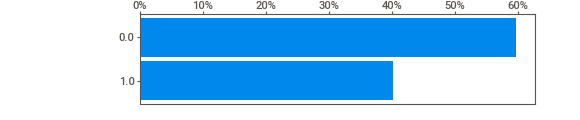
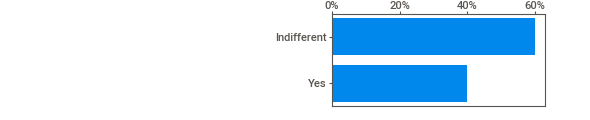
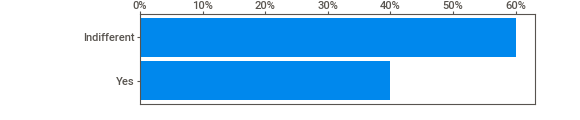
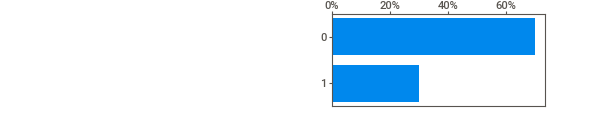
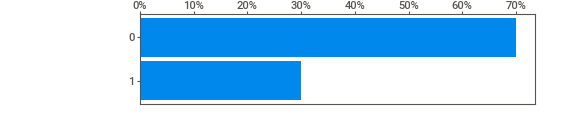
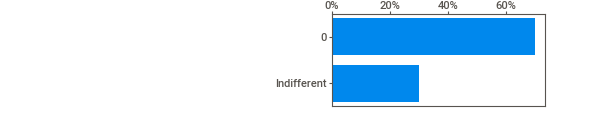
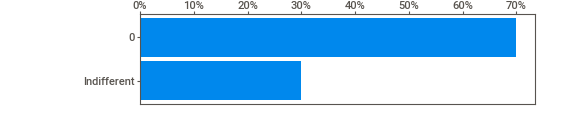
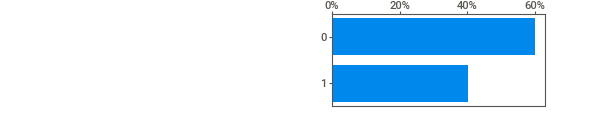
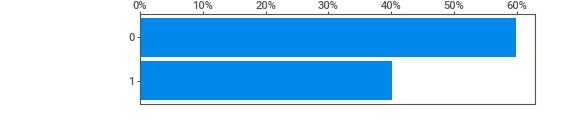
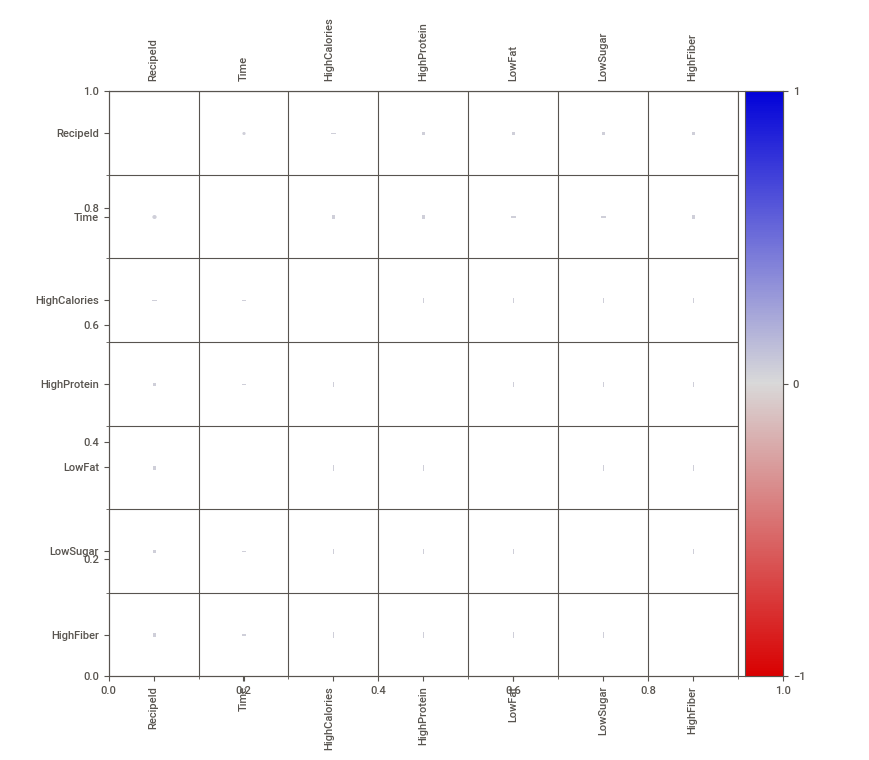
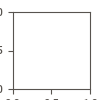

                                             |          | [  0%]   00:00 -> (? left)


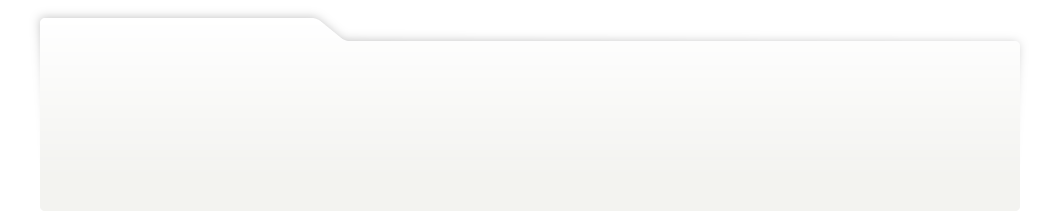
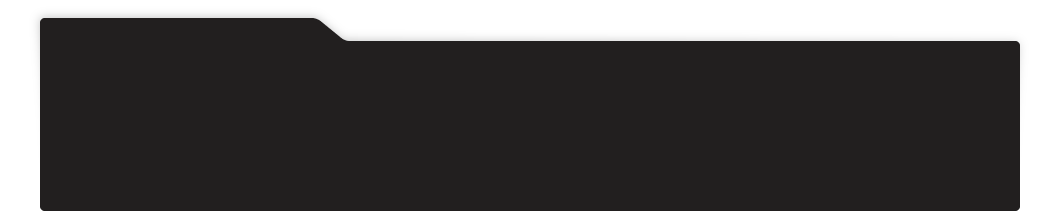
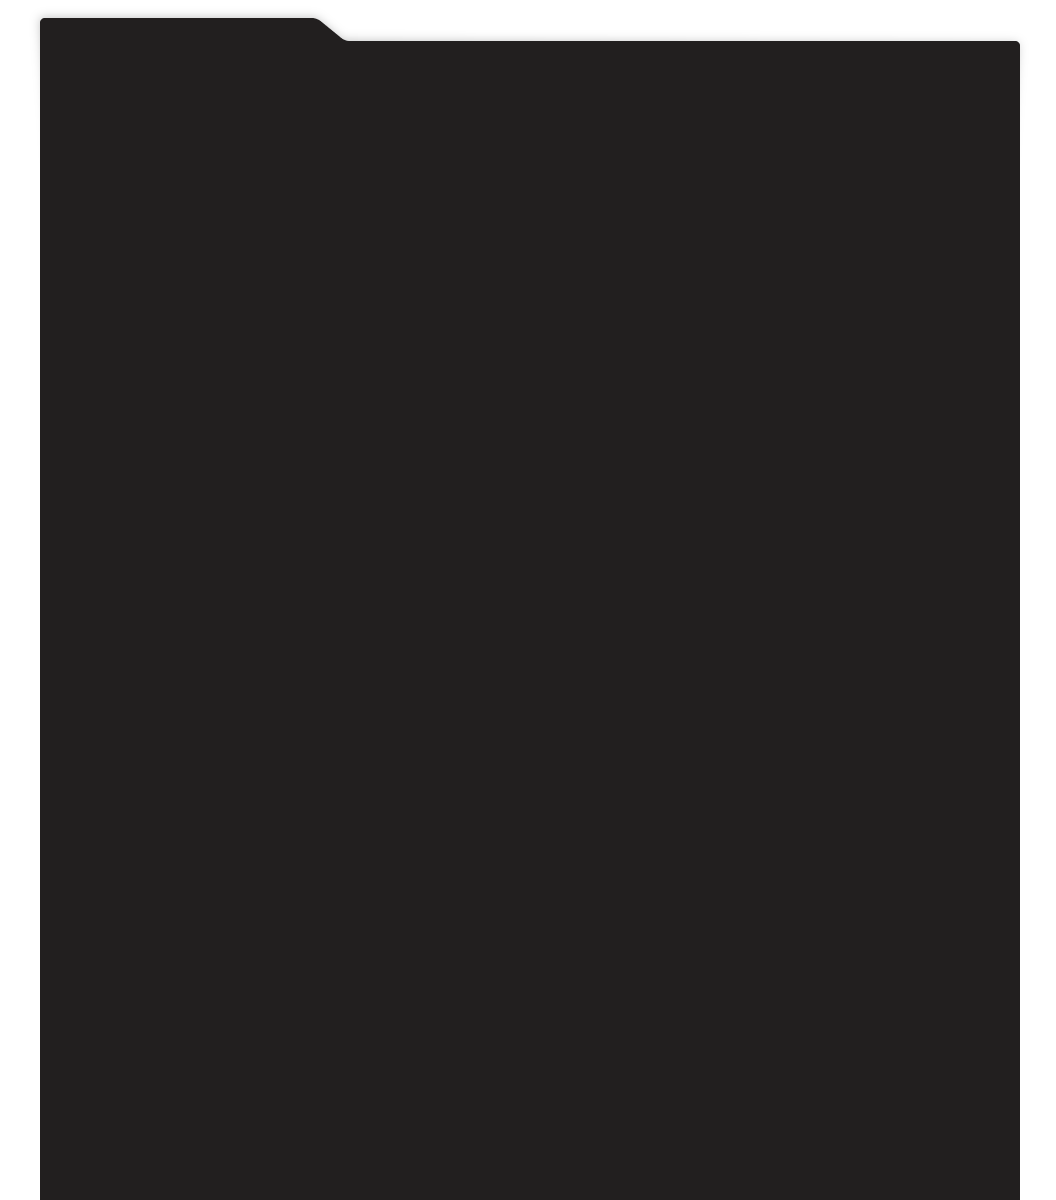
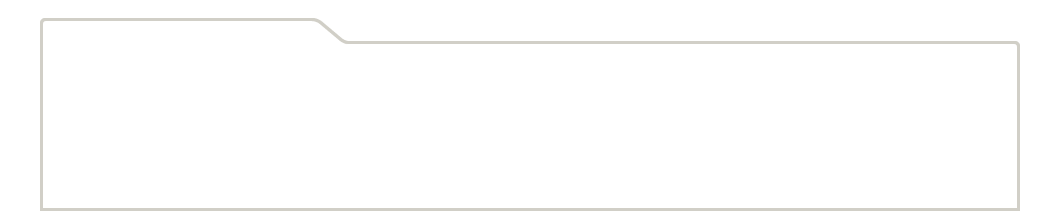
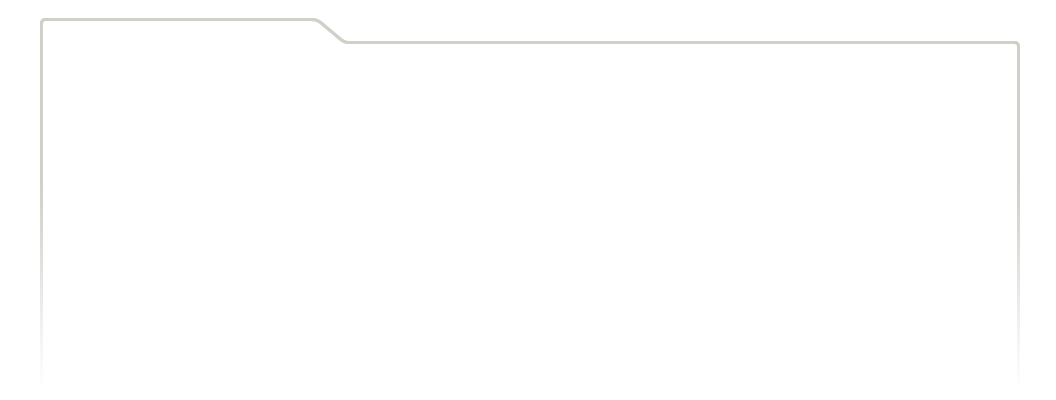
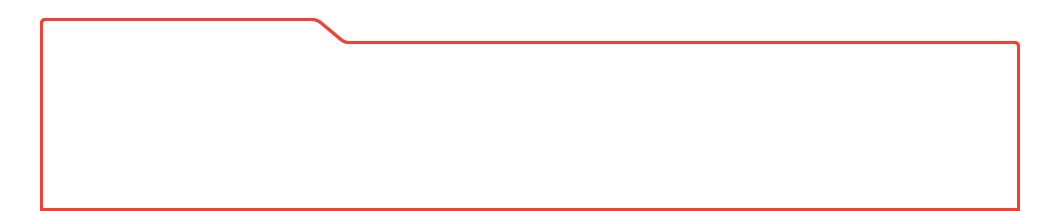
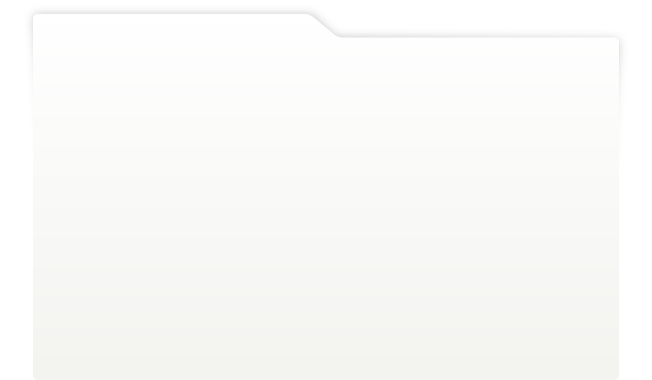
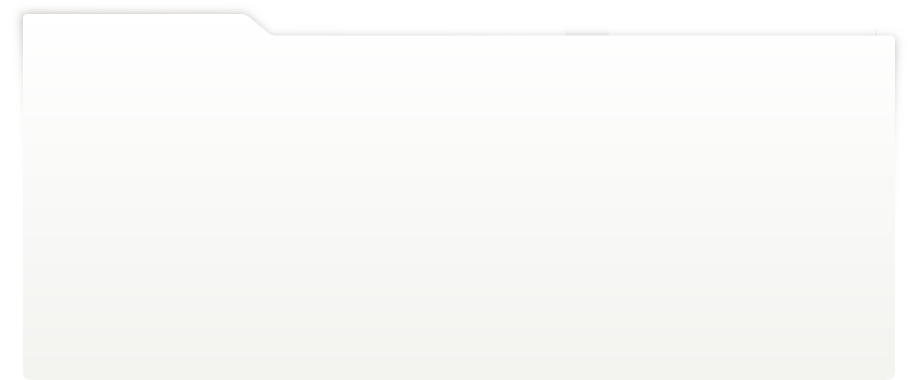
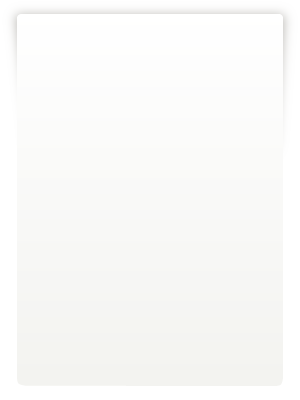
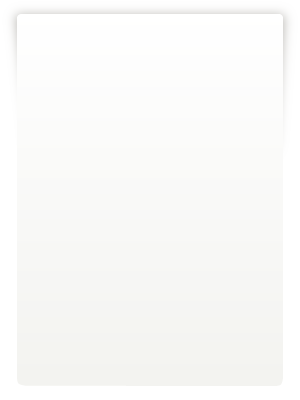
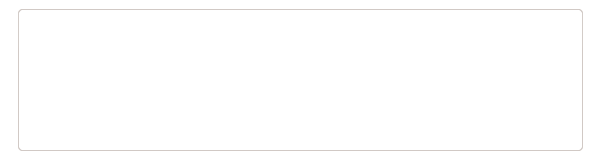
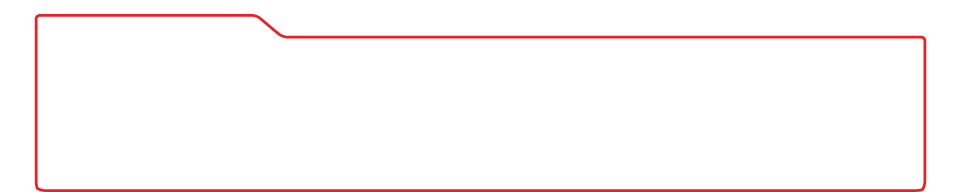
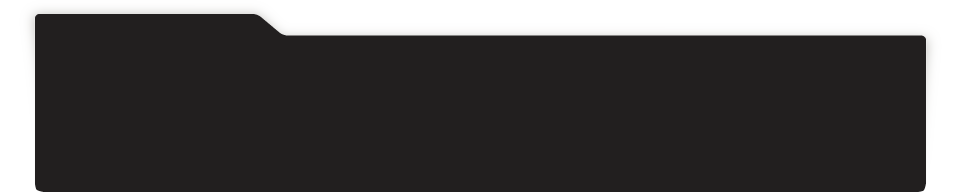
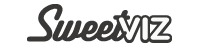
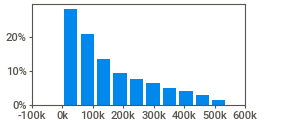
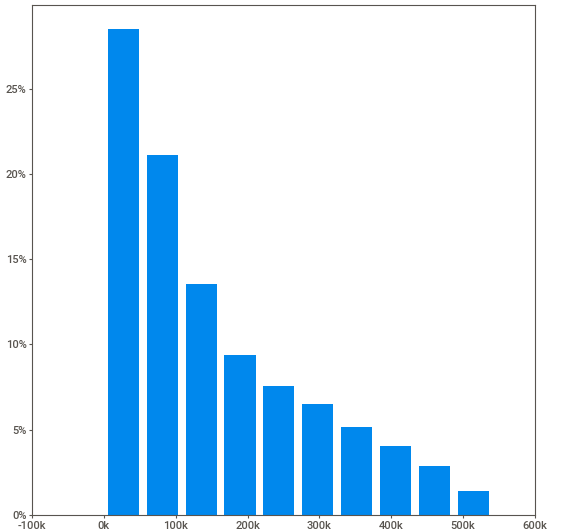
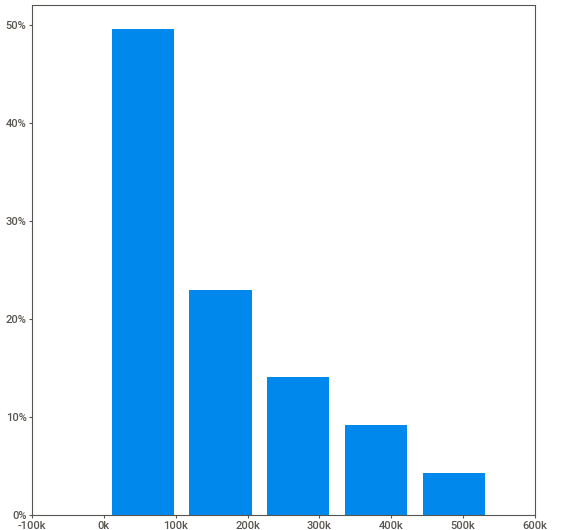
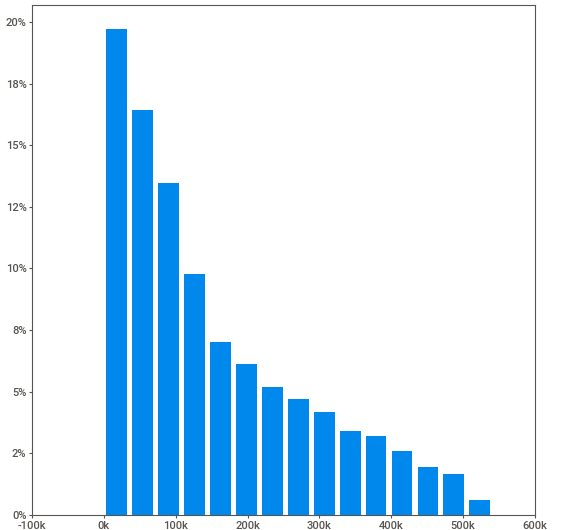
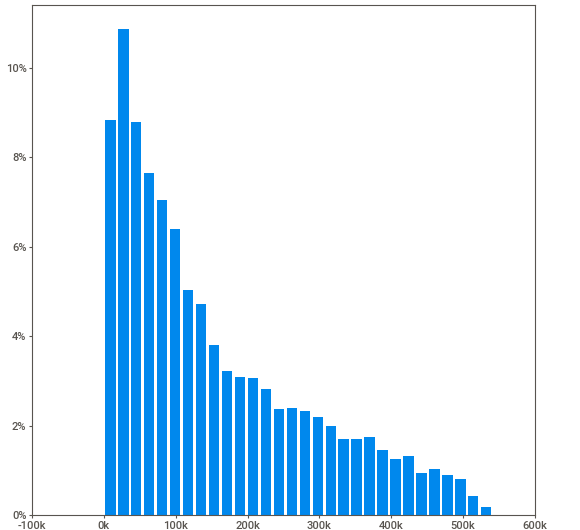
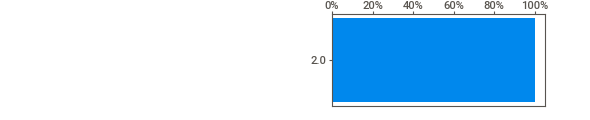
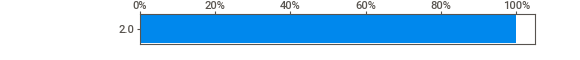
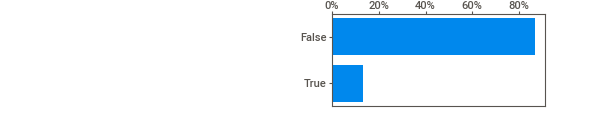
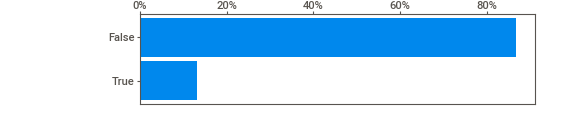
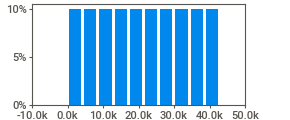
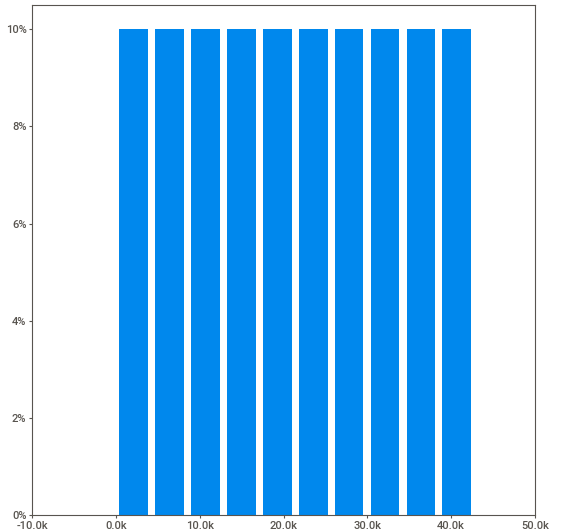
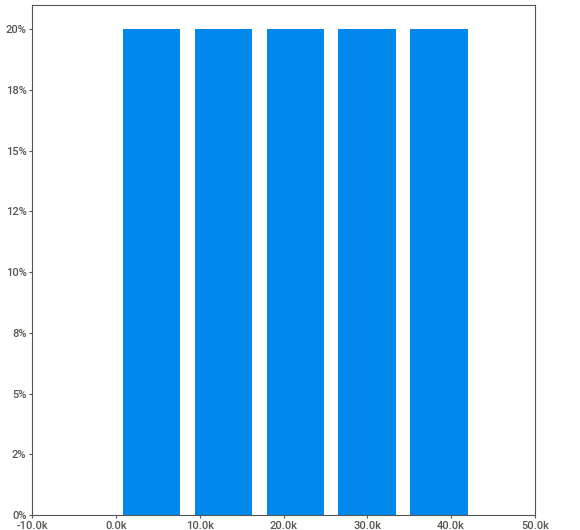
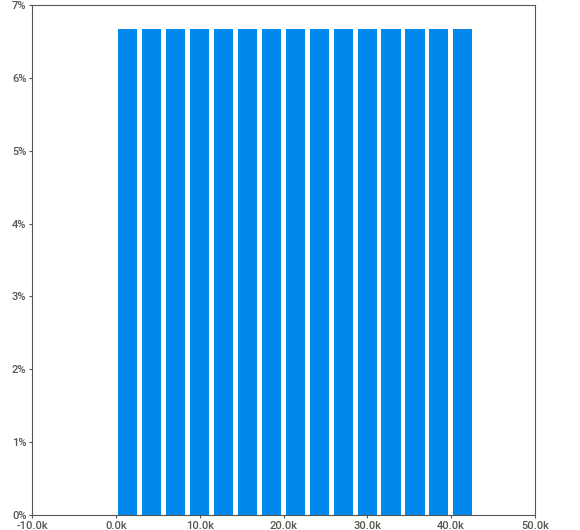
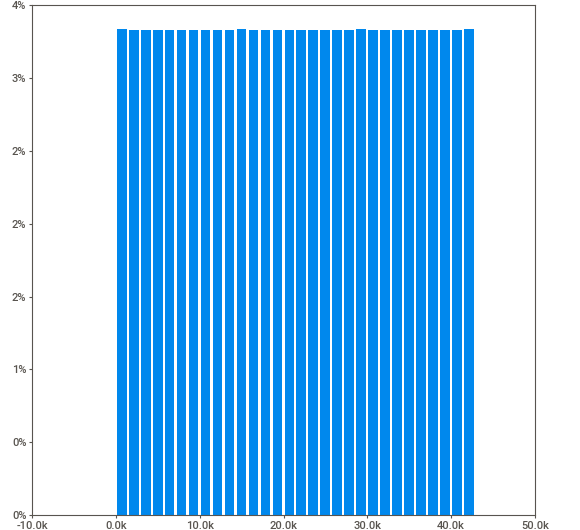
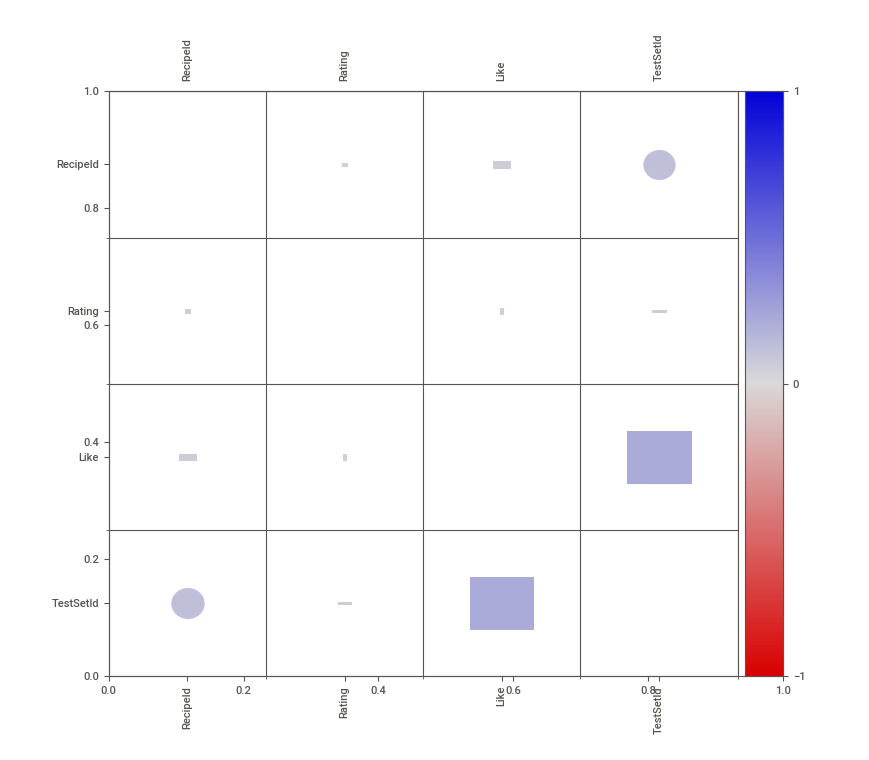
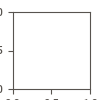

In [2]:
diet = pd.read_csv('diet.csv', sep=',')
recipes = pd.read_csv('recipes.csv', sep=',')
requests = pd.read_csv('requests.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

sv.analyze(diet).show_notebook()
sv.analyze(recipes).show_notebook()
sv.analyze(requests).show_notebook()
sv.analyze(reviews).show_notebook()

# Data Cleaning

## Diet

In [541]:
#clean up the diet data
diet = diet.dropna()
# convert diet to numeric
diet["Diet"] = diet["Diet"].map({"Vegan": 0, "Vegetarian": 1, "Omnivore": 2}).astype(int)

# def classify_age(age):
#     if age < 45:
#         return 1
#     elif 45 <= age < 65:
#         return 2
#     else:
#         return 3
# diet["Age"] = diet["Age"].apply(classify_age)

# drop the age column
# diet.drop(columns=['Age'], inplace=True)
# diet.info()
# diet.head()

## Recipes

In [542]:
# diet_dict_Omnivore = {
#     'meat': 'Omnivore',
#     'fish': 'Omnivore',
#     'beef': 'Omnivore',
#     'pork': 'Omnivore',
#     'chicken': 'Omnivore',
#     'chickens': 'Omnivore',
#     'duck': 'Omnivore',
#     'turkey': 'Omnivore',
#     'lamb': 'Omnivore',
#     'goat': 'Omnivore',
#     'rabbit': 'Omnivore',
#     'goose': 'Omnivore',
#     'mutton': 'Omnivore',
#     'ham': 'Omnivore',
#     'sausage': 'Omnivore',
#     'bacon': 'Omnivore',
#     'salmon' : 'Omnivore',
# }

# diet_dict_Vegetarian = {
#     'vegetarian': 'Vegetarian',
#     'egg': 'Vegetarian',
#     'eggs': 'Vegetarian',
#     'cheese': 'Vegetarian',
#     'milk': 'Vegetarian',
#     'yogurt': 'Vegetarian',
#     'cream': 'Vegetarian',
#     'butter': 'Vegetarian',
#     'honey': 'Vegetarian',
#     'cheese': 'Vegetarian',
#     'whip' : 'Vegetarian',
#     'marshmallow' : 'Vegetarian',
#     'pudding' : 'Vegetarian',
#     'mayonnaise' : 'Vegetarian',
# }
list_Omnivore = [
    "chicken", "beef", "gelatin", "bacon", "shrimp", "ham", "hoisin", "pork", "sausage", "prosciutto", "lamb", "fish", "turkey", "tuna", "oyster", "salmon", "fillet", "trout", "scallop", "mussel", "anchovy", "ladyfinger", "steak", "halibut", "crab", "squid", "sirloin", "pancetta", "rump", "anchovy", "anchovies", "red snapper", "clam", "duck", "kielbasa", "bouillon", "tasso", "trassi", "venison", "lobster", "pimento", "flounder", "rabbit", "chorizo", "haddock", "sole", "mahi", "mortadella", "caviar", "herring", "liver", "roast", "sea bass", "quail", "cod", "lox", "suet", "speck", "nam pla", "perch", "sardine", "smelt", "pheasant", "lardon", "aspic", "tripe", "veal", "bresaola", "borscht", "alligator", "suet", "nuoc nam", "partridge", "goose", "succotash", "eel", "jamon", "jamsn", "calf", "quahog", "grouper", "foie gras", "rabbit", "pike", "abalone", "cottage roll", "glace de viande"
]

# egg milk cheese butter
list_Vegetarian = [
    "butter", "cheddar", "cheese", "cream", "milk", "egg", "mayonnaise", "pudding", "cool whip", "creme", "worcestershire sauce", "miracle whip", "yogurt", "feta", "ghee", "panir", "gruyere", "yoghurt", "puff pastry", "queso", "custard", "phyllo", "parmigiano", "fontina", "muffin", "bisquick", "mascarpone", "mozzarella", "pastry", "shortening", "icing", "pignolis", "amchur", "bagel", "crepes", "ricotta", "cake", "amaretti", "parmesan", "quark", "ranch", "rusk", "dolcelatte", "shortbread", "rarebit"
]

# def classify_diet(ingredients):
#     for ingredient in diet_dict:
#         if ingredient in ingredients:
#             return diet_dict[ingredient]
#     return 'Vegan'

# def classify_diet(ingredients):
#     ingredients = ingredients.lower() 
#     words = ingredients.split()
#     for ingredient in diet_dict_Omnivore:
#         if ingredient in words:
#             return diet_dict_Omnivore[ingredient]
#     for ingredient in diet_dict_Vegetarian:
#         if ingredient in words:
#             return diet_dict_Vegetarian[ingredient]
#     return 'Vegan'

# def classify_diet(ingredients):
#     ingredients.lower()
#     for ingredient in list_Omnivore:
#         if ingredients.find(ingredient) != -1:
#             return 'Omnivore'
#     for ingredient in list_Vegetarian:
#         if ingredients.find(ingredient) != -1:
#             return 'Vegetarian'
#     return 'Vegan'

def classify_diet(ingredients):
    for ingredient in [x.lower() for x in ingredients]:
        for ingredient_ominivore in list_Omnivore:
            if ingredient_ominivore in ingredient:
                return 'Omnivore'
    for ingredient in [x.lower() for x in ingredients]:
        for ingredient_vegetarian in list_Vegetarian:
            if ingredient_vegetarian in ingredient:
                return 'Vegetarian'
    return 'Vegan'

# recipes["Diet"] = recipes["RecipeIngredientParts"].apply(classify_diet)

In [543]:
# clean up recipes data

# add a column for total time
recipes["TotalTime"] = recipes["CookTime"] + recipes["PrepTime"]
recipes.drop(columns="CookTime", inplace=True)
recipes.drop(columns="PrepTime", inplace=True)

# convert recipe category to numeric
recipes["RecipeCategory"] = recipes["RecipeCategory"].map({"Other" : 1, "Lunch" : 2, "One dish meal" : 3, "Bread" : 4 , "Breakfast" : 5, "Beverages" : 6, "Soup" : 7}).astype(int)

# convert recipe ingredient to numeric
recipes["RecipeIngredientParts"] = recipes["RecipeIngredientParts"].apply(lambda x : re.findall(r"\"\\\"([a-zA-Z ]+)\\\"\"", x))
# recipes["RecipeIngredientParts"] = recipes["RecipeIngredientParts"].apply(lambda x : " ".join(x))
recipes["RecipeDietType"] = recipes["RecipeIngredientParts"].apply(classify_diet).map({"Vegan": 0, "Vegetarian": 1, "Omnivore": 2}).astype(int)

print(recipes["RecipeDietType"].value_counts())

# drop columns: Name, RecipeCategory, RecipeIngredientQuantities, RecipeIngredientParts, SaturatedFatContent, CholesterolContent,RecipeServings, RecipeYield
recipes = recipes.drop(columns=["Name","RecipeIngredientQuantities","RecipeIngredientParts", "SaturatedFatContent","CholesterolContent","RecipeServings","RecipeYield"])
# recipes = recipes.drop(columns=["Name", "RecipeIngredientQuantities","RecipeIngredientParts", "SaturatedFatContent","CholesterolContent","FiberContent", "RecipeServings","RecipeYield"])

# corr_matrix = recipes.corr()
# print(corr_matrix)

RecipeDietType
1    33390
2    26033
0    16181
Name: count, dtype: int64


## Requests

In [544]:
# clean up the requests data
requests = requests.dropna()

# convert negative time to 0.0
# requests["Time"] = requests["Time"].map(lambda x : 0.0 if x < 0.0 else x)
requests["Time"] = requests["Time"]
# print(requests["Time"].value_counts())

# convert falgs to numeric
requests["HighCalories"] = requests["HighCalories"].astype(int)
requests["HighProtein"] = requests["HighProtein"].map({"Indifferent": -1, "Yes": 1}).astype(int)
requests["LowFat"] = requests["LowFat"].astype(bool)

# convert indiffernt to -1
requests["LowSugar"] = requests["LowSugar"].map({"Indifferent": -1, "0": 0}).astype(int)
requests["HighFiber"] = requests["HighFiber"].astype(bool)

# drop columns: HighProtein
# requests.drop(columns=["HighProtein"], inplace=True)

# corr_matrix = requests.drop(columns=["AuthorId", "RecipeId"]).corr()
# print(corr_matrix)

## Reviews

In [545]:
# clean up the reviews data
reviews.drop(columns="Rating", inplace=True)

## Merge data

In [546]:
# merge the reviews and diet data
training_dataset = reviews.merge(diet, on="AuthorId", how="inner")
# merge feedback with the recipes data
training_dataset = training_dataset.merge(recipes, on="RecipeId", how="inner")
# merge feedback with the requests data
training_dataset = training_dataset.merge(requests, on=["AuthorId", "RecipeId"], how="inner")

# clean up the feedback data
training_dataset.drop(columns="AuthorId", inplace=True)
training_dataset.drop(columns="RecipeId", inplace=True)

# add new column with the boolean value if the costumer's  request time and recipe time are not too different
training_dataset["TimeSatisfied"] = (training_dataset["TotalTime"] - training_dataset["Time"]).map(lambda x : True if abs(x) <= 1.0 else False)
training_dataset.drop(columns="TotalTime", inplace=True)
training_dataset.drop(columns="Time", inplace=True)

# add new column with the boolean value if the costumer's diet and recipe diet type are the same
training_dataset["DietSatisfied"] = training_dataset["Diet"] == training_dataset["RecipeDietType"]
training_dataset.drop(columns="Diet", inplace=True)
training_dataset.drop(columns="RecipeDietType", inplace=True)

# add new column with the boolean value if the recipes is high calories and the costumer's request is high calories true, select 500 as dividing line
training_dataset["CaloriesSatisfied"] = (training_dataset["HighCalories"] == 1) & (training_dataset["Calories"] >= 800)
training_dataset.drop(columns="HighCalories", inplace=True)
training_dataset.drop(columns="Calories", inplace=True)

# add new column with the boolean value if the recipes is low fat and the costumer's request is low fat true, select 10 as dividing line
training_dataset["FatSatisfied"] = (training_dataset["LowFat"] == 1) & (training_dataset["FatContent"] <= 10)
training_dataset.drop(columns="LowFat", inplace=True)
training_dataset.drop(columns="FatContent", inplace=True)

# add new column with the boolean value if the recipes is low sugar sa
# if the costumer's request of low sugar is indifferent, then is true
# 5 is the dividing line for low sugar
# training_dataset["SugarSatisfied"] = (training_dataset["LowSugar"] == -1) | (training_dataset["LowSugar"] == 1 & (training_dataset["SugarContent"] <= 0.5))
# training_dataset.drop(columns="LowSugar", inplace=True)
training_dataset.drop(columns="SugarContent", inplace=True)


# add new column with the boolean value if the recipes is high fiber and the costumer's request is high fiber true, select 4 as dividing line
training_dataset["FiberSatisfied"] = (training_dataset["HighFiber"] == 1) & (training_dataset["FiberContent"] >= 3.5)
training_dataset.drop(columns="HighFiber", inplace=True)
training_dataset.drop(columns="FiberContent", inplace=True)


# extract the submission_dataset with the testid
submission_dataset = training_dataset.dropna(subset=['TestSetId']).copy()
submission_dataset.sort_values(by=['TestSetId'], inplace=True)
submission_dataset.reset_index(drop=True, inplace=True)
submission_dataset.drop(columns="TestSetId", inplace=True)
submission_dataset.drop(columns="Like", inplace=True)

# print(submission_dataset.head())

# clean up the feedback data
training_dataset = training_dataset.dropna(subset=['Like'])
training_dataset.drop(columns="TestSetId", inplace=True)
training_dataset["Like"] = training_dataset["Like"].astype(int)

# print(training_dataset["CaloriesSatisfied"].value_counts())
# print(training_dataset["Like"].value_counts())

# corr_matrix = training_dataset.corr()
# print(corr_matrix)

training_dataset.info()
# print(training_dataset["SugarSatisfied"].value_counts())
# print(training_dataset["FiberSatisfied"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 97381 entries, 18 to 140194
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Like                 97381 non-null  int32  
 1   Age                  97381 non-null  int64  
 2   RecipeCategory       97381 non-null  int32  
 3   SodiumContent        97381 non-null  float64
 4   CarbohydrateContent  97381 non-null  float64
 5   ProteinContent       97381 non-null  float64
 6   HighProtein          97381 non-null  int32  
 7   LowSugar             97381 non-null  int32  
 8   TimeSatisfied        97381 non-null  bool   
 9   DietSatisfied        97381 non-null  bool   
 10  CaloriesSatisfied    97381 non-null  bool   
 11  FatSatisfied         97381 non-null  bool   
 12  FiberSatisfied       97381 non-null  bool   
dtypes: bool(5), float64(3), int32(4), int64(1)
memory usage: 5.7 MB


In [547]:
# # # select randomly 50% of the traning dataset
# # training_dataset = training_dataset.sample(frac=0.1, random_state=seed).reset_index(drop=True)
# # check calories distribution
# selected_data = training_dataset[(training_dataset['Like'] == 1) & (training_dataset['LowSugar'] == 1)]['CarbohydrateContent']
# selected_data = selected_data[selected_data < 1600]
# plt.figure(figsize=(10, 6))
# plt.scatter(selected_data.index, selected_data)
# plt.xlabel("Index")
# plt.ylabel("Calories")
# plt.title("Distribution of Calories when Like=1 and HighCalories=1")
# plt.show()

# selected_data = training_dataset[(training_dataset['Like'] == 1) & (training_dataset['HighCalories'] == 0)]['Calories']
# selected_data = selected_data[selected_data < 1600]
# plt.figure(figsize=(10, 6))
# plt.scatter(selected_data.index, selected_data)
# plt.xlabel("Index")
# plt.ylabel("Calories")
# plt.title("Distribution of Calories when Like=1 and HighCalories=0")
# plt.show()

# selected_data = training_dataset[(training_dataset['Like'] == 0) & (training_dataset['HighCalories'] == 1)]['Calories']
# selected_data = selected_data[selected_data < 1000]
# plt.figure(figsize=(10, 6))
# plt.scatter(selected_data.index, selected_data)
# plt.xlabel("Index")
# plt.ylabel("Calories")
# plt.title("Distribution of Calories when Like=0 and HighCalories=1")
# plt.show()

# selected_data = training_dataset[(training_dataset['Like'] == 0) & (training_dataset['HighCalories'] == 0)]['Calories']
# selected_data = selected_data[selected_data < 1000]
# plt.figure(figsize=(10, 6))
# plt.scatter(selected_data.index, selected_data)
# plt.xlabel("Index")
# plt.ylabel("Calories")
# plt.title("Distribution of Calories when Like=0 and HighCalories=0")
# plt.show()

# Model training

In [548]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
import sys
import os
import pydotplus
from sklearn import tree
from IPython.display import Image


In [549]:
X_train, X_test, y_train, y_test = train_test_split(training_dataset.drop(columns="Like"), training_dataset["Like"], test_size=0.25, random_state=seed)

In [550]:
# data scaling
transform_scaler = StandardScaler()

# dimensionality reduction
transform_pca = PCA()
model_logistic_regression = LogisticRegression()
model_random_forest = RandomForestClassifier()
model_gradient_boosting = GradientBoostingClassifier()
model_ada_boosting = AdaBoostClassifier()

# # train the models
pipeline = Pipeline(steps=[("scaler", transform_scaler), 
                           ("pca", transform_pca),
                           ("model", None)])

parameter_grid_preprocessing = {
  "pca__n_components" : [7,8,9,10,11]
}

parameter_logistic_regression = {
  "model" : [model_logistic_regression],
  "model__C" : [0.1, 1, 10],
  "model__class_weight" : ["balanced"]
}

parameter_grid_gradient_boosting = {
  "model" : [model_gradient_boosting],
  "model__n_estimators" : [100],  # number of max trees in the forest
  "model__max_depth" : [60, 70, 80, 90],
}

parameter_grid_random_forest = {
  "model" : [model_random_forest],
  "model__n_estimators" : [90, 100],  # number of max trees in the forest
  "model__max_depth" : [60, 70, 80],
  "model__class_weight" : ["balanced"]
}

parameter_ada_boosting = {
  "model" : [model_ada_boosting],
  "model__n_estimators" : [50, 100, 150],  # number of max trees in the forest
  "model__learning_rate" : [0.8],
}


meta_parameter_grid = [parameter_logistic_regression]

# meta_parameter_grid = [parameter_ada_boosting]

meta_parameter_grid = [{**parameter_grid_preprocessing, **model_grid}
                       for model_grid in meta_parameter_grid]

search = GridSearchCV(pipeline,
                      meta_parameter_grid, 
                      scoring="balanced_accuracy",
                      n_jobs=4, 
                      cv=5,  # number of folds for cross-validation 
                      error_score="raise"
)

# here, the actual training and grid search happens
search.fit(X_train, y_train.values.ravel())

print("best parameter:", search.best_params_ ,"(CV score=%0.3f)" % search.best_score_)

best parameter: {'model': LogisticRegression(), 'model__C': 10, 'model__class_weight': 'balanced', 'pca__n_components': 11} (CV score=0.720)


In [551]:
balance_acc = balanced_accuracy_score(y_test, search.best_estimator_.predict(X_test))
print("balanced accuracy:", balance_acc)

# best parameter: {'model': LogisticRegression(), 'model__C': 0.1, 'model__class_weight': 'balanced', 'pca__n_components': 7} (CV score=0.709)
# dividing line for calories: 800
# dividing line for fat: 10
# dividing line for sugar: 5
# dividing line for fiber: 8

# version 2 without age
# best parameter: {'model': LogisticRegression(), 'model__C': 0.05, 'model__class_weight': 'balanced', 'pca__n_components': 6} (CV score=0.642)

# version 3 with age classify
# best parameter: {'model': RandomForestClassifier(), 'model__class_weight': 'balanced', 'model__max_depth': 70, 'model__n_estimators': 90, 'pca__n_components': 6} (CV score=0.698)


balanced accuracy: 0.7172658510616257


In [552]:
# evaluate performance of model on test set
print("Score on test set:", search.score(X_test, y_test.values.ravel()))

# contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_test), y_test.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)


Score on test set: 0.7172658510616257
true      0     1
pred             
0     15014   895
1      6097  2340


In [553]:
predictions = search.best_estimator_.predict(submission_dataset)
predictions = pd.DataFrame(predictions, columns=["prediction"])
predictions.index = predictions.index + 1
predictions.to_csv("submission.csv", index=True, index_label="id")